In [7]:
#a code block that deals with concentration and drug names
#we do not use this block for now.
#Dna ： etoposide，Gemcitabine
#mt：paclitaxel，Vinblastine
#hsp：17aag，auy922

#prot："MG132"，ps341
#hdac：saha，apicidin
#cross_class 

import pandas as pd
f1 = pd.read_csv('B.csv')
f2 = pd.read_csv('C.csv')
f3=pd.read_csv('D.csv')
f4=pd.read_csv('E.csv')
f5=pd.read_csv('A_ks5.csv')
file = [f1,f2,f3,f5]
train = pd.concat(file,axis=1)
train.to_csv("train.csv", index=0, sep=',')


In [8]:
#do some further processing with "A" because there are some data error in it
def remove_extradots(string):
    counter=0
    lst=[]
    for i in range(len(string)):
        if string[i]=='.' and counter<1 :
            lst.append(string[i])
            counter+=1
        elif string[i]!='.':
            lst.append(string[i])
    res="".join(lst)
    return res



import csv
res_list=[]
print(remove_extradots("-0.29444.2"))
with open('A_ks5.csv') as file2:
    reader=csv.reader(file2)

    for row in reader:
        data=[]
        for i in range(len(row)):
            
            data.append(remove_extradots(row[i]))
        res_list.append(data)
    


with open('modified_A.csv', 'w') as file3:
    writer = csv.writer(file3)
    writer.writerows(res_list)
file3.close()
                


-0.294442


In [9]:
#test file A
import pandas as pd
df_A=pd.read_csv("A_ks5.csv")
df_A.shape
#df_A2=pd.read_csv("A_modified.csv")
#df_A2.shape


(767, 239)

In [10]:
#a block that is used to concate the drug names(drug combinations and related concentration)

import csv
res_list=[]
with open('train.csv', 'r') as file:
    reader = csv.reader(file)
    
    for row in reader:
        data=[]
        data.append(row[0]+'+'+row[1]+"+"+row[2])
        res_list.append(data)

        
        
with open('concatenated.csv', 'w') as file2:
    writer = csv.writer(file2)
    writer.writerows(res_list)

In [11]:
#a block that is used to concate concentration and ks numbers.
import pandas as pd
f1 = pd.read_csv('concatenated.csv')
#f2 = pd.read_csv('C.csv')
f3=pd.read_csv('D.csv')
f4=pd.read_csv('E.csv')
f5=pd.read_csv('modified_A.csv')
file = [f1,f5]
train = pd.concat(file,axis=1)
train.to_csv("train3.csv", index=0, sep=',')

In [12]:
#a block that sets the fields for the drug data
import csv
fields=['drug_name','default']
for i in range(1,239):
    fields.append('ks'+str(i))
rows=[]
with open('train3.csv', 'r') as file:
    reader = csv.reader(file)
    
    for row in reader:
        rows.append(row)

        
        
with open('drug_withfields2.csv', 'w') as file2:
    writer = csv.writer(file2)
    writer.writerow(fields)
    writer.writerows(rows)

In [13]:
#do some further processing with "drug_withfields" because there are still some data error in it
def remove_extradots(string):
    counter=0
    lst=[]
    for i in range(len(string)):
        if string[i]=='.' and counter<1 :
            lst.append(string[i])
            counter+=1
        elif string[i]!='.':
            lst.append(string[i])
    res="".join(lst)
    return res



import csv
res_list=[]
print(remove_extradots("-0.29444.2"))
with open('drug_withfields2.csv') as file2:
    reader=csv.reader(file2)

    for row in reader:
        data=[]
        for i in range(len(row)):
            
            data.append(remove_extradots(row[i]))
        res_list.append(data)
    


with open('drug_with_fields.csv', 'w') as file3:
    writer = csv.writer(file3)
    writer.writerows(res_list)
file3.close()
                

-0.294442


In [14]:
df=pd.read_csv('drug_with_fields.csv')
#one type first type. dna
frames=[]
for i in range(7):
    frames.append(df.loc[(df['drug_name'] =='Etoposide+Paclitaxel+'+str(i)) ])
for i in range(7):
    frames.append(df.loc[(df['drug_name'] =='Paclitaxel+Etoposide+'+str(i)) ])
for i in range(7):
    frames.append(df.loc[(df['drug_name'] =='Etoposide+Etoposide+'+str(i)) ])
for i in range(7):
    frames.append(df.loc[(df['drug_name'] =='Paclitaxel+Paclitaxel+'+str(i)) ])




e_and_p = pd.concat(frames)
e_and_p



drug_name  default       ks1       ks2       ks3       ks4  \
120   Etoposide+Paclitaxel+1        0 -0.846670 -0.663110 -0.789380 -0.884760   
122   Etoposide+Paclitaxel+2        0 -0.948330 -0.375430 -0.334610 -0.451520   
124   Etoposide+Paclitaxel+3        0 -0.760830 -0.147850 -0.210250  0.160570   
126   Etoposide+Paclitaxel+4        0 -0.361800  0.229630  0.223180  0.240800   
128   Etoposide+Paclitaxel+5        0 -0.058284  0.088440  0.075076  0.240700   
130   Etoposide+Paclitaxel+6        0  0.095894 -0.098137 -0.083238  0.193900   
24    Paclitaxel+Etoposide+1        0 -0.680620 -0.851010 -0.991660 -0.981870   
26    Paclitaxel+Etoposide+2        0 -0.686670  0.201060  0.253560  0.191230   
28    Paclitaxel+Etoposide+3        0 -0.035000 -0.078124 -0.107970  0.316880   
30    Paclitaxel+Etoposide+4        0  0.058507 -0.095412 -0.135600  0.389410   
32    Paclitaxel+Etoposide+5        0  0.084414 -0.080815 -0.047830  0.254250   
34    Paclitaxel+Etoposide+6        0  0.079262 -0.114600 -0.103290  0.212910   
0      Etoposide+Etoposide+1        0 -0.930830 -0.494530 -0.571140 -0.799580   
2      Etoposide+Etoposide+2        0 -0.925000 -0.400790 -0.318350 -0.538470   
4      Etoposide+Etoposide+3        0 -0.612500  0.097551 -0.134220  0.145150   
6      Etoposide+Etoposide+4        0  0.097702 -0.056872  0.052675  0.092692   
8      Etoposide+Etoposide+5        0  0.086735  0.059167  0.080377  0.131050   
10     Etoposide+Etoposide+6        0  0.101740 -0.058135  0.029234  0.118040   
144  Paclitaxel+Paclitaxel+1        0 -0.300830 -0.840350 -1.000000 -0.997500   
146  Paclitaxel+Paclitaxel+2        0 -0.701670  0.215270  0.294070  0.091438   
148  Paclitaxel+Paclitaxel+3        0 -0.475830  0.268630  0.201940  0.281090   
150  Paclitaxel+Paclitaxel+4        0 -0.341030  0.212930  0.278850  0.138780   
152  Paclitaxel+Paclitaxel+5        0 -0.089338  0.154390  0.170250  0.172360   
154  Paclitaxel+Paclitaxel+6        0  0.142920 -0.104830 -0.041014  0.057095   

          ks5       ks6       ks7       ks8  ...     ks229     ks230  \
120 -0.933720 -0.806660 -0.748630 -0.722390  ... -0.277370  0.154730   
122 -0.714800 -0.348860 -0.267030 -0.226220  ...  0.232800  0.248270   
124 -0.344720 -0.244520 -0.162720 -0.139860  ...  0.412510  0.166410   
126  0.128740  0.177700  0.251450  0.263140  ...  0.268230  0.126220   
128 -0.044116 -0.030284  0.101760  0.117550  ...  0.029492  0.046294   
130 -0.164690 -0.136600 -0.065088 -0.041870  ... -0.133680  0.051104   
24  -1.000000 -0.993540 -0.971240 -0.947690  ... -0.624510 -0.206660   
26  -0.098699  0.159940  0.315230  0.340850  ...  0.122930  0.347530   
28  -0.158460 -0.139360 -0.082519 -0.063477  ... -0.036736  0.030062   
30  -0.184960 -0.213550 -0.110020 -0.070833  ... -0.102420  0.040860   
32  -0.124920 -0.094469  0.038700  0.066731  ... -0.107420  0.028553   
34  -0.125160 -0.123030 -0.082338 -0.068838  ... -0.126770  0.059551   
0   -0.885820 -0.605470 -0.502670 -0.483900  ... -0.081045  0.191610   
2   -0.806570 -0.364790 -0.259440 -0.227850  ...  0.209710  0.219110   
4   -0.135310 -0.134520 -0.132050 -0.126850  ...  0.448330  0.139830   
6   -0.035013  0.022697  0.067232  0.089390  ... -0.135830  0.052788   
8    0.028573  0.041073  0.097591  0.110090  ... -0.094087  0.048276   
10  -0.071427 -0.024583  0.042422  0.067318  ... -0.105350  0.043098   
144 -1.000000 -1.000000 -0.999140 -0.997430  ... -0.584100 -0.102890   
146 -0.061154  0.242050  0.341930  0.333870  ...  0.185270  0.184740   
148  0.101080  0.136620  0.230790  0.260900  ...  0.381840  0.066984   
150  0.130820  0.237260  0.300770  0.302080  ...  0.246680  0.123350   
152  0.079247  0.132480  0.189570  0.190650  ...  0.069583  0.041740   
154 -0.067967 -0.043463  0.054461  0.072370  ... -0.171350  0.051535   

        ks231     ks232     ks233     ks234     ks235     ks236     ks237  \
120 -0.150620 -0.253280 -0.246950  0.154730 -0.265350 -0.311100 -0.302470   
122 -0.319700  0.317800  0.289170  0.2

In [15]:
import plotly.express as px

df = px.data.gapminder().query("country in ['Canada', 'Botswana']")

fig = px.line(df, x="lifeExp", y="gdpPercap", color="country", text="year")
fig.update_traces(textposition="bottom right")
fig.show()

In [16]:
df

country continent  year  lifeExp       pop     gdpPercap iso_alpha  \
156  Botswana    Africa  1952   47.622    442308    851.241141       BWA   
157  Botswana    Africa  1957   49.618    474639    918.232535       BWA   
158  Botswana    Africa  1962   51.520    512764    983.653976       BWA   
159  Botswana    Africa  1967   53.298    553541   1214.709294       BWA   
160  Botswana    Africa  1972   56.024    619351   2263.611114       BWA   
161  Botswana    Africa  1977   59.319    781472   3214.857818       BWA   
162  Botswana    Africa  1982   61.484    970347   4551.142150       BWA   
163  Botswana    Africa  1987   63.622   1151184   6205.883850       BWA   
164  Botswana    Africa  1992   62.745   1342614   7954.111645       BWA   
165  Botswana    Africa  1997   52.556   1536536   8647.142313       BWA   
166  Botswana    Africa  2002   46.634   1630347  11003.605080       BWA   
167  Botswana    Africa  2007   50.728   1639131  12569.851770       BWA   
240    Canada  Americas  1952   68.750  14785584  11367.161120       CAN   
241    Canada  Americas  1957   69.960  17010154  12489.950060       CAN   
242    Canada  Americas  1962   71.300  18985849  13462.485550       CAN   
243    Canada  Americas  1967   72.130  20819767  16076.588030       CAN   
244    Canada  Americas  1972   72.880  22284500  18970.570860       CAN   
245    Canada  Americas  1977   74.210  23796400  22090.883060       CAN   
246    Canada  Americas  1982   75.760  25201900  22898.792140       CAN   
247    Canada  Americas  1987   76.860  26549700  26626.515030       CAN   
248    Canada  Americas  1992   77.950  28523502  26342.884260       CAN   
249    Canada  Americas  1997   78.610  30305843  28954.925890       CAN   
250    Canada  Americas  2002   79.770  31902268  33328.965070       CAN   
251    Canada  Americas  2007   80.653  33390141  36319.235010       CAN   

     iso_num  
156       72  
157       72  
158       72  
159       72  
160       72  
161       72  
162       72  
163       72  
164       72  
165       72  
166       72  
167       72  
240      124  
241      124  
242      124  
243      124  
244      124  
245      124  
246      124  
247      124  
248      124  
249      124  
250      124  
251      124

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_drug = e_and_p.iloc[:, 2:240].values

X_drug = StandardScaler().fit_transform(X_drug)

pca_drug = PCA(n_components=2)
components = pca_drug.fit_transform(X_drug)
components
principalDf = pd.DataFrame(data = components
             , columns = ['principal component 1', 'principal component 2'])
         #    'principal component 3', 'principal component 4','principal component 5', 'principal component 6','principal component 7', 'principal component 8'])
principalDf

principal component 1  principal component 2
0               17.732302               7.611875
1               15.670291              -4.954000
2               11.273231              -9.650016
3               -1.751017             -10.095477
4               -7.162838              -0.871674
5               -8.417285               4.523072
6               10.115718              20.310005
7                2.870274              -7.405959
8               -7.223325               0.661638
9              -10.219964               4.134119
10             -10.472970               4.115612
11              -9.798792               3.944867
12              16.057682               1.896392
13              14.767469              -5.156981
14               8.040113             -11.519067
15              -9.726104               3.269126
16             -10.800681               2.426058
17             -11.161335               3.800358
18              13.288192              18.463952
19              -0.074588              -7.312307
20              -2.652510             -11.422153
21              -1.739155             -10.279496
22              -7.833092              -2.478452
23             -10.781616               5.988508

In [18]:
def change_order(lst):
    newlst=[]
    for i in range(0,24,4):
        newlst.append(lst[i])
    for i in range(1,24,4):
        newlst.append(lst[i])
    for i in range(2,24,4):
        newlst.append(lst[i])
    for i in range(3,24,4):
        newlst.append(lst[i])
    for i in range(24,48,4):
        newlst.append(lst[i])
    for i in range(25,48,4):
        newlst.append(lst[i])
    for i in range(26,48,4):
        newlst.append(lst[i])
    for i in range(27,48,4):
        newlst.append(lst[i])
    for i in range(48,72,4):
        newlst.append(lst[i])
    for i in range(49,72,4):
        newlst.append(lst[i])
    for i in range(50,72,4):
        newlst.append(lst[i])
    for i in range(51,72,4):
        newlst.append(lst[i])
    return newlst
change_order(components)


IndexError: index 24 is out of bounds for axis 0 with size 24

In [ ]:
principalDf = pd.DataFrame(data = components
             , columns = ['principal component 1', 'principal component 2'])
         #    'principal component 3', 'principal component 4','principal component 5', 'principal component 6','principal component 7', 'principal component 8'])
principalDf

principal component 1  principal component 2
0               16.929167              -3.682618
1               23.270059              -3.829854
2               19.554579              -4.698267
3               24.385678              -5.287473
4                7.491789               0.387921
..                    ...                    ...
67             -11.695734              13.865953
68               2.932762               1.991501
69               1.191407               3.476439
70              -0.248638               2.144858
71              -4.530974               6.326806

[72 rows x 2 columns]

In [ ]:
len(components)

72

In [ ]:
label=[]
for i in range(6):
    label.append("Paclitaxel+Etoposide1")
for i in range(6):
    label.append("Paclitaxel+Etoposide2")
for i in range(6):
    label.append("Paclitaxel+Etoposide3")
for i in range(6):
    label.append("Paclitaxel+Etoposide4")

for i in range(6):
    label.append("Etoposide1")
for i in range(6):
    label.append("Etoposide2")
for i in range(6):
    label.append("Etoposide3")
for i in range(6):
    label.append("Etoposide4")

for i in range(6):
    label.append("Paclitaxel1")
for i in range(6):
    label.append("Paclitaxel2")
for i in range(6):
    label.append("Paclitaxel3")
for i in range(6):
    label.append("Paclitaxel4")



In [ ]:
import plotly.express as px

fig = px.line(principalDf, x='principal component 1', y='principal component 2', color=label,markers=True)
fig.show()

In [19]:
df=pd.read_csv('drug_with_fields.csv')
#one type first type. dna

df31=df.loc[(df['drug_name'] =='Etoposide+Etoposide+1') ]
df32=df.loc[(df['drug_name'] =='Etoposide+Etoposide+2') ]
df33=df.loc[(df['drug_name'] =='Etoposide+Etoposide+3') ]
df34=df.loc[(df['drug_name'] =='Etoposide+Etoposide+4') ]
df35=df.loc[(df['drug_name'] =='Etoposide+Etoposide+5') ]
df36=df.loc[(df['drug_name'] =='Etoposide+Etoposide+6') ]

df41=df.loc[(df['drug_name'] =='Gemcitabine+DMSO+1') ]
df42=df.loc[(df['drug_name'] =='Gemcitabine+DMSO+2') ]
df43=df.loc[(df['drug_name'] =='Gemcitabine+DMSO+3') ]
df44=df.loc[(df['drug_name'] =='Gemcitabine+DMSO+4') ]
df45=df.loc[(df['drug_name'] =='Gemcitabine+DMSO+5') ]
df46=df.loc[(df['drug_name'] =='Gemcitabine+DMSO+6') ]





frames = [df31, df32,df33,df34,df35,df36,df41,df42,df43,df44,df45,df46]
DNA = pd.concat(frames)
DNA



drug_name  default       ks1       ks2       ks3       ks4  \
0    Etoposide+Etoposide+1        0 -0.930830 -0.494530 -0.571140 -0.799580   
2    Etoposide+Etoposide+2        0 -0.925000 -0.400790 -0.318350 -0.538470   
4    Etoposide+Etoposide+3        0 -0.612500  0.097551 -0.134220  0.145150   
6    Etoposide+Etoposide+4        0  0.097702 -0.056872  0.052675  0.092692   
8    Etoposide+Etoposide+5        0  0.086735  0.059167  0.080377  0.131050   
10   Etoposide+Etoposide+6        0  0.101740 -0.058135  0.029234  0.118040   
324     Gemcitabine+DMSO+1        0 -0.797500 -0.774160 -0.924260 -0.976470   
708     Gemcitabine+DMSO+1        0 -0.985000 -0.238530  0.173650 -0.375830   
326     Gemcitabine+DMSO+2        0 -0.964170 -0.427820 -0.215510 -0.412310   
710     Gemcitabine+DMSO+2        0 -0.973330 -0.468610 -0.427310 -0.555280   
328     Gemcitabine+DMSO+3        0 -0.958330 -0.313640 -0.297650 -0.547350   
712     Gemcitabine+DMSO+3        0 -0.958330 -0.471420 -0.341790 -0.568830   
330     Gemcitabine+DMSO+4        0 -0.234910 -0.073754 -0.096515 -0.033579   
714     Gemcitabine+DMSO+4        0 -0.348330 -0.063748 -0.123940 -0.056227   
332     Gemcitabine+DMSO+5        0  0.126020 -0.065029  0.019334  0.054224   
716     Gemcitabine+DMSO+5        0  0.090647 -0.054375 -0.056818  0.065697   
334     Gemcitabine+DMSO+6        0  0.088122 -0.081690 -0.040731 -0.083171   
718     Gemcitabine+DMSO+6        0  0.126410 -0.069876  0.026834 -0.023680   

          ks5       ks6       ks7       ks8  ...     ks229     ks230  \
0   -0.885820 -0.605470 -0.502670 -0.483900  ... -0.081045  0.191610   
2   -0.806570 -0.364790 -0.259440 -0.227850  ...  0.209710  0.219110   
4   -0.135310 -0.134520 -0.132050 -0.126850  ...  0.448330  0.139830   
6   -0.035013  0.022697  0.067232  0.089390  ... -0.135830  0.052788   
8    0.028573  0.041073  0.097591  0.110090  ... -0.094087  0.048276   
10  -0.071427 -0.024583  0.042422  0.067318  ... -0.105350  0.043098   
324 -0.993920 -0.934210 -0.917100 -0.908810  ... -0.331480  0.184800   
708 -0.749040 -0.161470  0.219360  0.318910  ...  0.401730  0.421470   
326 -0.654740 -0.266350 -0.130380  0.158850  ...  0.208650  0.319360   
710 -0.795090 -0.470650 -0.383240 -0.379260  ...  0.240460  0.210740   
328 -0.728640 -0.314850 -0.251670 -0.199390  ...  0.254850  0.226520   
712 -0.812690 -0.444380 -0.303180 -0.277130  ...  0.151820  0.228700   
330 -0.107620 -0.096364 -0.092685 -0.093448  ...  0.132630  0.097712   
714 -0.130050 -0.128550 -0.118480 -0.112080  ...  0.213070  0.124730   
332  0.023409 -0.020235  0.025724  0.041293  ... -0.149330  0.033644   
716 -0.040172 -0.078836 -0.040374 -0.025424  ... -0.110280  0.030927   
334 -0.091296 -0.040677  0.038625  0.047961  ... -0.134420  0.056355   
718 -0.024863 -0.043613  0.028470  0.034305  ... -0.131980  0.029695   

        ks231     ks232     ks233     ks234     ks235     ks236     ks237  \
0   -0.217910  0.135640  0.109241  0.191611 -0.457840 -0.457700 -0.306950   
2   -0.316050  0.302770  0.269690  0.219110 -0.682210 -0.677890 -0.436920   
4   -0.284680  0.535250  0.513990  0.139830 -0.458720 -0.513200 -0.164460   
6   -0.042936 -0.105850 -0.116150  0.052788  0.122380  0.109650 -0.061423   
8   -0.029692 -0.090616 -0.095434  0.048276  0.135300  0.114380 -0.046655   
10  -0.033994 -0.094549 -0.101240  0.043098  0.096732  0.081555 -0.054561   
324 -0.132630 -0.257950 -0.251180  0.184800 -0.253330 -0.268820 -0.310390   
708 -0.460260  0.479290  0.499870  0.421470 -0.739620 -0.748780 -0.561030   
326 -0.366670  0.375000  0.314360  0.319360 -0.633460 -0.679420 -0.384680   
710 -0.352500  0.328800  0.283060  0.210740 -0.631570 -0.685740 -0.351850   
328 -0.461360  0.375530  0.326520  0.226520 -0.660830 -0.695610 -0.331210   
712 -0.312190  0.223640  0.219320  0.228700 -0.653890 -0.694880 -0.497930   
330 -0.143410  0.172950  0.141870  0.097712 -0.212060 -0.236850 -0.109450   
714 -0.168780  0.282520  0.271930  0.124730 -0.296320 -0.310660 -0.1

In [ ]:

#one type first type. mt

df31=df.loc[(df['drug_name'] =='Paclitaxel+Paclitaxel+1') ]
df32=df.loc[(df['drug_name'] =='Paclitaxel+Paclitaxel+2') ]
df33=df.loc[(df['drug_name'] =='Paclitaxel+Paclitaxel+3') ]
df34=df.loc[(df['drug_name'] =='Paclitaxel+Paclitaxel+4') ]
df35=df.loc[(df['drug_name'] =='Paclitaxel+Paclitaxel+5') ]
df36=df.loc[(df['drug_name'] =='Paclitaxel+Paclitaxel+6') ]

df41=df.loc[(df['drug_name'] =='Vinblastine+DMSO+1') ]
df42=df.loc[(df['drug_name'] =='Vinblastine+DMSO+2') ]
df43=df.loc[(df['drug_name'] =='Vinblastine+DMSO+3') ]
df44=df.loc[(df['drug_name'] =='Vinblastine+DMSO+4') ]
df45=df.loc[(df['drug_name'] =='Vinblastine+DMSO+5') ]
df46=df.loc[(df['drug_name'] =='Vinblastine+DMSO+6') ]




frames2 = [df31,df32,df33,df34,df35,df36,df41,df42,df43,df44,df45,df46]
MT= pd.concat(frames2)
MT
#print(len(dna),len(mt))




drug_name  default      ks1       ks2       ks3      ks4  \
1164  Paclitaxel+Paclitaxel+1        0 -0.75917 -0.581090 -0.394530 -0.39493   
1165  Paclitaxel+Paclitaxel+1        0 -0.76292 -0.463100 -0.236850 -0.27625   
1188  Paclitaxel+Paclitaxel+1        0 -0.89875 -0.495110 -0.249690 -0.29585   
1189  Paclitaxel+Paclitaxel+1        0 -0.65500 -0.345930 -0.212800 -0.15639   
1166  Paclitaxel+Paclitaxel+2        0 -0.76292 -0.298510 -0.153210 -0.25071   
1167  Paclitaxel+Paclitaxel+2        0 -0.67458 -0.252440 -0.093939 -0.18939   
1190  Paclitaxel+Paclitaxel+2        0 -0.47708 -0.221080 -0.291030  0.15201   
1191  Paclitaxel+Paclitaxel+2        0 -0.81625 -0.149960  0.050048 -0.17892   
1168  Paclitaxel+Paclitaxel+3        0 -0.81958 -0.350840 -0.284890 -0.17063   
1169  Paclitaxel+Paclitaxel+3        0 -0.85708 -0.260420 -0.149580 -0.14875   
1192  Paclitaxel+Paclitaxel+3        0 -0.39917 -0.195230 -0.211890 -0.12080   
1193  Paclitaxel+Paclitaxel+3        0 -0.85500 -0.189010 -0.187890  0.14592   
1170  Paclitaxel+Paclitaxel+4        0 -0.68958 -0.276200 -0.264980 -0.25179   
1171  Paclitaxel+Paclitaxel+4        0 -0.43879 -0.362900 -0.275850 -0.33936   
1194  Paclitaxel+Paclitaxel+4        0 -0.54500 -0.214980 -0.209910  0.13634   
1195  Paclitaxel+Paclitaxel+4        0 -0.53167 -0.193310 -0.238600  0.18114   
1172  Paclitaxel+Paclitaxel+5        0 -0.71708 -0.193750 -0.220420 -0.20208   
1173  Paclitaxel+Paclitaxel+5        0 -0.61417 -0.262830 -0.330450 -0.17707   
1196  Paclitaxel+Paclitaxel+5        0 -0.90542 -0.334940 -0.333250  0.18409   
1197  Paclitaxel+Paclitaxel+5        0 -0.93917 -0.221210 -0.179410 -0.10474   
1174  Paclitaxel+Paclitaxel+6        0 -0.38792 -0.167260 -0.189480 -0.17018   
1175  Paclitaxel+Paclitaxel+6        0 -0.69333 -0.300190 -0.395320 -0.18685   
1198  Paclitaxel+Paclitaxel+6        0 -0.39208 -0.115670 -0.134950  0.17338   
1199  Paclitaxel+Paclitaxel+6        0 -0.68292 -0.207980 -0.285210 -0.10103   
972        Vinblastine+DMSO+1        0 -0.53500 -0.178750 -0.195340  0.10686   
973        Vinblastine+DMSO+1        0 -0.57167 -0.135670 -0.106230 -0.12021   
996        Vinblastine+DMSO+1        0 -0.49500 -0.259960 -0.192130 -0.18467   
997        Vinblastine+DMSO+1        0 -0.46792 -0.194520 -0.163120 -0.09825   
974        Vinblastine+DMSO+2        0 -0.15458 -0.239900 -0.369590  0.28835   
975        Vinblastine+DMSO+2        0 -0.15042 -0.307400 -0.466850  0.33771   
998        Vinblastine+DMSO+2        0 -0.39000 -0.050435 -0.080462  0.22177   
999        Vinblastine+DMSO+2        0  0.10907 -0.045425 -0.104990  0.13264   
976        Vinblastine+DMSO+3        0  0.25399 -0.106960 -0.201100  0.26500   
977        Vinblastine+DMSO+3        0  0.33090 -0.316810 -0.417980  0.27741   
1000       Vinblastine+DMSO+3        0  0.35289 -0.166990 -0.270700  0.33236   
1001       Vinblastine+DMSO+3        0  0.32644 -0.094653 -0.178480  0.21099   
978        Vinblastine+DMSO+4        0  0.39300 -0.055157 -0.118280  0.24382   
979        Vinblastine+DMSO+4        0  0.32119 -0.536190 -0.597890 -0.11739   
1002       Vinblastine+DMSO+4        0  0.26862 -0.074119 -0.119070  0.13735   
1003       Vinblastine+DMSO+4        0  0.31510 -0.249130 -0.272400  0.11689   
980        Vinblastine+DMSO+5        0 -0.10542  0.039410 -0.085726  0.23436   
981        Vinblastine+DMSO+5        0 -0.12083 -0.085087 -0.142320  0.17877   
1004       Vinblastine+DMSO+5        0  0.30091  0.071185 -0.073675  0.16550   
1005       Vinblastine+DMSO+5        0  0.29468 -0.122850 -0.152540  0.11914   
982        Vinblastine+DMSO+6        0  0.26703  0.065653  0.040268  0.26808   
983        Vinblastine+DMSO+6        0  0.36139  0.117590  0.071241  0.27949   
1006       Vinblastine+DMSO+6        0  0.30811  0.115500  0.090120  0.19653   
1007       Vinblastine+DMSO+6        0  0.32540 -0.113220 -0.186790  0.14145   

           ks5       ks6       ks7       ks8  ...     ks229     ks230  \
1164 -0.802460 -0.535120 -

In [ ]:
len(MT)

48

In [ ]:
1536-192*3
#960
#8*3=24 
#8+6+4+2=20 20*2=40
#select 2 out of 10
#45-5=40
960//40


24

In [ ]:

frames3=[]

for j in range(7):
    frames3.append(df.loc[(df['drug_name'] =='AUY922+AUY922+'+str(j)) ])
for i in range(7):
    frames3.append(df.loc[(df['drug_name'] =='17AAG+DMSO+'+str(i)) ])




HSP= pd.concat(frames3)
HSP




drug_name  default      ks1       ks2       ks3       ks4  \
1356  AUY922+AUY922+1        0 -0.84708 -0.336630 -0.340760 -0.133110   
1357  AUY922+AUY922+1        0 -0.69042 -0.426700 -0.476500 -0.188580   
1380  AUY922+AUY922+1        0 -0.84000 -0.222560 -0.242630 -0.081178   
1381  AUY922+AUY922+1        0 -0.95208 -0.247860  0.141810 -0.174970   
1358  AUY922+AUY922+2        0 -0.69500 -0.278550 -0.282500 -0.163270   
1359  AUY922+AUY922+2        0 -0.59708 -0.427940 -0.432160 -0.181830   
1382  AUY922+AUY922+2        0 -0.82542 -0.423390 -0.415470 -0.250000   
1383  AUY922+AUY922+2        0 -0.91167 -0.153160 -0.163180 -0.079468   
1360  AUY922+AUY922+3        0 -0.78917 -0.333510 -0.520130  0.235030   
1361  AUY922+AUY922+3        0 -0.77583  0.060192 -0.252980  0.153240   
1384  AUY922+AUY922+3        0 -0.56542 -0.392970 -0.493240 -0.188920   
1385  AUY922+AUY922+3        0 -0.56125 -0.262080 -0.396120 -0.076667   
1362  AUY922+AUY922+4        0  0.14309 -0.287870 -0.341040 -0.116910   
1363  AUY922+AUY922+4        0  0.23755 -0.088415 -0.135660  0.035096   
1386  AUY922+AUY922+4        0 -0.14042  0.083026  0.071798 -0.046930   
1387  AUY922+AUY922+4        0  0.31763 -0.188850 -0.218690 -0.113240   
1364  AUY922+AUY922+5        0  0.30359 -0.084274 -0.078748 -0.027199   
1365  AUY922+AUY922+5        0  0.44312 -0.085928 -0.099377 -0.026612   
1388  AUY922+AUY922+5        0 -0.15417 -0.065205  0.071349 -0.163340   
1389  AUY922+AUY922+5        0 -0.11500 -0.032500  0.035076 -0.086894   
1366  AUY922+AUY922+6        0  0.37327  0.068687  0.106070 -0.024393   
1367  AUY922+AUY922+6        0  0.42067 -0.074772 -0.106450 -0.036357   
1390  AUY922+AUY922+6        0 -0.18667  0.157480  0.187510 -0.038980   
1391  AUY922+AUY922+6        0 -0.20792 -0.209440 -0.160900 -0.148090   
480      17AAG+DMSO+1        0 -0.14625 -0.307940 -0.227910 -0.182310   
481      17AAG+DMSO+1        0 -0.25375 -0.441880 -0.374610 -0.187470   
504      17AAG+DMSO+1        0 -0.19000 -0.482730 -0.419340 -0.203270   
505      17AAG+DMSO+1        0  0.13105 -0.375240 -0.278330 -0.153200   
482      17AAG+DMSO+2        0 -0.16083 -0.246190 -0.217300 -0.088039   
483      17AAG+DMSO+2        0 -0.22125 -0.381090 -0.323780 -0.231010   
506      17AAG+DMSO+2        0 -0.26667 -0.248890 -0.213350 -0.142850   
507      17AAG+DMSO+2        0 -0.13292 -0.443190 -0.317310 -0.220220   
484      17AAG+DMSO+3        0 -0.22833 -0.403970 -0.394550 -0.180640   
485      17AAG+DMSO+3        0 -0.14583 -0.327080 -0.345860 -0.111070   
508      17AAG+DMSO+3        0 -0.27375 -0.404110 -0.413570 -0.202800   
509      17AAG+DMSO+3        0 -0.24792 -0.356940 -0.406720 -0.155490   
486      17AAG+DMSO+4        0 -0.32000 -0.378360 -0.590980 -0.180590   
487      17AAG+DMSO+4        0 -0.10841 -0.322380 -0.472440  0.066028   
510      17AAG+DMSO+4        0 -0.14708 -0.202140 -0.366090  0.068057   
511      17AAG+DMSO+4        0  0.19957 -0.281060 -0.448880  0.076698   
488      17AAG+DMSO+5        0  0.16821 -0.383300 -0.514120  0.056716   
489      17AAG+DMSO+5        0  0.24934 -0.529810 -0.632000 -0.149080   
512      17AAG+DMSO+5        0  0.26100 -0.414100 -0.545120 -0.090556   
513      17AAG+DMSO+5        0  0.39996 -0.610440 -0.700830 -0.263500   
490      17AAG+DMSO+6        0  0.40645 -0.473310 -0.556600 -0.060176   
491      17AAG+DMSO+6        0  0.44542 -0.547440 -0.621750 -0.102500   
514      17AAG+DMSO+6        0  0.38452 -0.262650 -0.330920 -0.031580   
515      17AAG+DMSO+6        0  0.39431 -0.482520 -0.601680  0.111880   

           ks5       ks6       ks7       ks8  ...     ks229     ks230  \
1356 -0.550450 -0.412310 -0.313220 -0.296060  ...  0.103860  0.125720   
1357 -0.749330 -0.544920 -0.451680 -0.417360  ...  0.202750  0.121040   
1380 -0.442930 -0.318460 -0.238790 -0.208590  ...  0.424310  0.160000   
1381 -0.218790 -0.146180  0.121810  0.205780  ...  0.250160  0.356820   
1358 -0.534950 -0.410020 -0.252530 -0.217980  ...  0.187040  0.099155

In [ ]:
#Dna ： etoposide，Gemcitabine
#mt：paclitaxel，Vinblastine
#hsp：17aag，auy922

#prot："MG132"，ps341
#hdac：saha，apicidin

frames4=[]
for i in range(7):
    frames4.append(df.loc[(df['drug_name'] =='MG132+MG132+'+str(i)) ])
for j in range(7):
    frames4.append(df.loc[(df['drug_name'] =='PS341+DMSO+'+str(j)) ])


PROT= pd.concat(frames4)
PROT



drug_name  default      ks1       ks2       ks3       ks4       ks5  \
1308  MG132+MG132+1        0 -0.84458 -0.608840 -0.686540 -0.429200 -0.887940   
1309  MG132+MG132+1        0 -0.47292 -0.620860 -0.697250 -0.458060 -0.913610   
1332  MG132+MG132+1        0 -0.90542 -0.707680 -0.735280 -0.627940 -0.942000   
1333  MG132+MG132+1        0 -0.78500 -0.611850 -0.695030 -0.475600 -0.912220   
1310  MG132+MG132+2        0 -0.75000 -0.478250 -0.516770 -0.331170 -0.797840   
1311  MG132+MG132+2        0 -0.88792 -0.623460 -0.580880 -0.474030 -0.906110   
1334  MG132+MG132+2        0 -0.74250 -0.630110 -0.639200 -0.434070 -0.893620   
1335  MG132+MG132+2        0 -0.86792 -0.551050 -0.641430 -0.490590 -0.881230   
1312  MG132+MG132+3        0 -0.55792  0.071101 -0.084148  0.099220 -0.168520   
1313  MG132+MG132+3        0 -0.76625 -0.132550 -0.152800  0.153620 -0.181300   
1336  MG132+MG132+3        0 -0.51708 -0.409660 -0.451790 -0.125620 -0.510000   
1337  MG132+MG132+3        0 -0.72625 -0.169240 -0.198860 -0.077455 -0.235050   
1314  MG132+MG132+4        0 -0.10625 -0.202480 -0.217370 -0.072073 -0.059804   
1315  MG132+MG132+4        0  0.42226 -0.073864 -0.124190  0.027385  0.117980   
1338  MG132+MG132+4        0 -0.50792 -0.078759 -0.096765 -0.066518 -0.171490   
1339  MG132+MG132+4        0 -0.39917  0.095530  0.133560 -0.065455  0.062197   
1316  MG132+MG132+5        0 -0.60208  0.269400  0.423330 -0.092262  0.156370   
1317  MG132+MG132+5        0 -0.67625  0.199850  0.301580 -0.103180  0.174060   
1340  MG132+MG132+5        0  0.13857  0.071544  0.081949 -0.071521  0.082230   
1341  MG132+MG132+5        0  0.35809  0.081749  0.116370  0.056745  0.164890   
1318  MG132+MG132+6        0  0.37100 -0.155670 -0.186750 -0.044667 -0.028333   
1319  MG132+MG132+6        0  0.29703 -0.510250 -0.551210 -0.099014 -0.436760   
1342  MG132+MG132+6        0  0.37383 -0.072605 -0.091181  0.027177  0.051703   
1343  MG132+MG132+6        0  0.26980  0.078902  0.090713 -0.042696  0.154230   
492    PS341+DMSO+1        0 -0.34250 -0.582960 -0.577610 -0.453060 -0.915760   
493    PS341+DMSO+1        0 -0.28292 -0.612970 -0.536550 -0.460070 -0.908490   
516    PS341+DMSO+1        0 -0.38042 -0.549720 -0.556720 -0.454250 -0.895650   
517    PS341+DMSO+1        0 -0.23172 -0.484110 -0.502990 -0.393270 -0.838020   
494    PS341+DMSO+2        0 -0.29500 -0.593520 -0.572580 -0.464620 -0.909740   
495    PS341+DMSO+2        0 -0.37208 -0.529700 -0.415910 -0.386920 -0.880470   
518    PS341+DMSO+2        0 -0.21792 -0.477680 -0.416330 -0.346860 -0.832770   
519    PS341+DMSO+2        0 -0.25250 -0.586860 -0.555430 -0.455090 -0.913090   
496    PS341+DMSO+3        0 -0.28917 -0.473900 -0.399140 -0.280830 -0.741400   
497    PS341+DMSO+3        0 -0.28208 -0.428390 -0.376960 -0.181070 -0.706080   
520    PS341+DMSO+3        0 -0.41034 -0.517550 -0.448550 -0.268970 -0.758150   
521    PS341+DMSO+3        0 -0.29708 -0.369790 -0.290060 -0.192140 -0.657340   
498    PS341+DMSO+4        0 -0.11042 -0.175890 -0.230420  0.064472 -0.224170   
499    PS341+DMSO+4        0 -0.24375 -0.162320 -0.243930  0.050225 -0.202530   
522    PS341+DMSO+4        0 -0.12083 -0.407480 -0.510910 -0.124070 -0.533480   
523    PS341+DMSO+4        0 -0.14375 -0.446680 -0.530450 -0.115460 -0.575560   
500    PS341+DMSO+5        0  0.44501 -0.289700 -0.353540  0.077960 -0.199990   
501    PS341+DMSO+5        0  0.45207 -0.269730 -0.370160  0.130510 -0.151470   
524    PS341+DMSO+5        0  0.30321 -0.229020 -0.355170  0.276370 -0.209390   
525    PS341+DMSO+5        0  0.42938 -0.340340 -0.486640  0.271610 -0.377900   
502    PS341+DMSO+6        0  0.46104 -0.197230 -0.338200  0.367680 -0.206580   
503    PS341+DMSO+6        0  0.45036 -0.231600 -0.309050  0.190480 -0.158270   
526    PS341+DMSO+6        0  0.32575 -0.202050 -0.315460  0.327960 -0.214240   
527    PS341+DMSO+6        0  0.29507 -0.023149 -0.094558  0.197430  0.121850   

           ks6       ks7       ks8  ... 

In [ ]:
frames5=[]

for j in range(7):
    frames5.append(df.loc[(df['drug_name'] =='Apicidin+Apicidin+'+str(j)) ])
for i in range(7):
    frames5.append(df.loc[(df['drug_name'] =='SAHA+DMSO+'+str(i)) ])


HDAC= pd.concat(frames5)
HDAC





#dna: gemcitabine+etoposide
#mt: paclitaxel+vinblastine
#hsp: 17AAG+AUY922
#prot: MG132+PS341
#hdac: Apicidin+SAHA



drug_name  default      ks1       ks2       ks3       ks4  \
1212  Apicidin+Apicidin+1        0 -0.55792 -0.194790 -0.234200 -0.093386   
1213  Apicidin+Apicidin+1        0 -0.80833 -0.120190 -0.160510 -0.157220   
1236  Apicidin+Apicidin+1        0 -0.58250 -0.143510 -0.156190 -0.074442   
1237  Apicidin+Apicidin+1        0 -0.89583 -0.224400 -0.272890 -0.113330   
1214  Apicidin+Apicidin+2        0 -0.55792 -0.056940  0.111860 -0.122950   
1215  Apicidin+Apicidin+2        0 -0.35333 -0.047568  0.063691 -0.118290   
1238  Apicidin+Apicidin+2        0 -0.66833  0.076006  0.147360 -0.088779   
1239  Apicidin+Apicidin+2        0 -0.69333 -0.081991 -0.085370 -0.111020   
1216  Apicidin+Apicidin+3        0 -0.18833 -0.178380 -0.207930 -0.049603   
1217  Apicidin+Apicidin+3        0 -0.21191 -0.256000 -0.300880 -0.052927   
1240  Apicidin+Apicidin+3        0 -0.40083  0.073145  0.057002  0.073362   
1241  Apicidin+Apicidin+3        0 -0.59458  0.293190  0.285090  0.165830   
1218  Apicidin+Apicidin+4        0 -0.40583 -0.327450 -0.337180 -0.080602   
1219  Apicidin+Apicidin+4        0 -0.26083 -0.390920 -0.410090  0.030899   
1242  Apicidin+Apicidin+4        0 -0.43506 -0.451820 -0.514720 -0.033772   
1243  Apicidin+Apicidin+4        0 -0.15458  0.071412  0.080399  0.056508   
1220  Apicidin+Apicidin+5        0 -0.36625  0.246260  0.283620  0.101700   
1221  Apicidin+Apicidin+5        0  0.42608  0.070610  0.066234  0.158910   
1244  Apicidin+Apicidin+5        0 -0.37625  0.172740  0.268850 -0.075862   
1245  Apicidin+Apicidin+5        0 -0.49000 -0.436040 -0.405800 -0.210940   
1222  Apicidin+Apicidin+6        0  0.18580 -0.182660 -0.167970  0.028369   
1223  Apicidin+Apicidin+6        0  0.11721  0.192330  0.175110  0.200810   
1246  Apicidin+Apicidin+6        0  0.13280 -0.267490 -0.291640 -0.054583   
1247  Apicidin+Apicidin+6        0 -0.14458  0.308170  0.335830  0.140920   
1152          SAHA+DMSO+1        0 -0.56458 -0.224350 -0.219800 -0.124640   
1153          SAHA+DMSO+1        0 -0.48458 -0.182050 -0.165830 -0.118490   
1176          SAHA+DMSO+1        0 -0.87250 -0.285130 -0.310550  0.211160   
1177          SAHA+DMSO+1        0 -0.69667 -0.133160 -0.222900  0.304060   
1154          SAHA+DMSO+2        0 -0.38250 -0.135980 -0.154600  0.124340   
1155          SAHA+DMSO+2        0 -0.48208 -0.140340 -0.123450 -0.090430   
1178          SAHA+DMSO+2        0 -0.57500  0.085833 -0.145000  0.285830   
1179          SAHA+DMSO+2        0 -0.63000  0.226250  0.083826  0.361780   
1156          SAHA+DMSO+3        0 -0.23583 -0.313070 -0.339520 -0.142870   
1157          SAHA+DMSO+3        0 -0.56875 -0.116520 -0.067190 -0.158980   
1180          SAHA+DMSO+3        0 -0.45375  0.240370  0.128460  0.287750   
1181          SAHA+DMSO+3        0 -0.57583  0.176810  0.103550  0.149100   
1158          SAHA+DMSO+4        0  0.12928 -0.144130 -0.145460 -0.074948   
1159          SAHA+DMSO+4        0  0.38744  0.190870  0.169680  0.097853   
1182          SAHA+DMSO+4        0  0.18315  0.181860  0.133000  0.243190   
1183          SAHA+DMSO+4        0 -0.14458  0.256500  0.262500  0.098250   
1160          SAHA+DMSO+5        0 -0.11625 -0.115510 -0.075823 -0.113580   
1161          SAHA+DMSO+5        0 -0.23667 -0.311270 -0.334400 -0.046480   
1184          SAHA+DMSO+5        0 -0.69292  0.233720  0.282400 -0.063214   
1185          SAHA+DMSO+5        0 -0.52917 -0.132510 -0.158670 -0.059359   
1162          SAHA+DMSO+6        0 -0.27500 -0.032218 -0.044990 -0.041843   
1163          SAHA+DMSO+6        0 -0.38125 -0.596710 -0.624410 -0.164550   
1186          SAHA+DMSO+6        0 -0.27917  0.309620  0.307600  0.152960   
1187          SAHA+DMSO+6        0 -0.40583  0.443100  0.440090 -0.077500   

           ks5       ks6       ks7       ks8  ...     ks229     ks230  \
1212 -0.562520 -0.399930 -0.193930 -0.152750  ... -0.434320 -0.096292   
1213 -0.547080 -0.235050  0.163890  0.270370  ... -0.356440 -0.109720   
1236 -0.533810 -0.24337

In [ ]:
#single component drug
#5 class. 10 single component. 10*24=240
#96 dmso

In [ ]:
frames6=[]




for j in range(7):
    frames6.append(df.loc[(df['drug_name'] =='DMSO+DMSO+'+str(j)) ])


DMSO=pd.concat(frames6)
DMSO





#dna: gemcitabine+etoposide
#mt: paclitaxel+vinblastine
#hsp: 17AAG+AUY922
#prot: MG132+PS341
#hdac: Apicidin+SAHA



drug_name  default      ks1       ks2      ks3       ks4       ks5  \
1404  DMSO+DMSO+1        0  0.26423 -0.191470 -0.27980  0.146180 -0.195440   
1405  DMSO+DMSO+1        0 -0.28583  0.170760  0.25228 -0.124140  0.169460   
1428  DMSO+DMSO+1        0 -0.19833  0.160910  0.18385 -0.112090  0.192170   
1429  DMSO+DMSO+1        0 -0.82292  0.648170  0.66317 -0.118250  0.496000   
1452  DMSO+DMSO+1        0 -0.33340 -0.086441 -0.13814  0.111720 -0.121250   
...           ...      ...      ...       ...      ...       ...       ...   
1511  DMSO+DMSO+6        0 -0.16667  0.155690  0.19518 -0.063792  0.139510   
1522  DMSO+DMSO+6        0 -0.42792  0.157340  0.20903 -0.115940  0.077149   
1523  DMSO+DMSO+6        0 -0.20167 -0.460820 -0.43696 -0.237590 -0.343520   
1534  DMSO+DMSO+6        0  0.19065  0.036852  0.10324 -0.077310  0.058329   
1535  DMSO+DMSO+6        0 -0.18625  0.195590  0.26197 -0.086891  0.182060   

          ks6      ks7      ks8  ...     ks229     ks230     ks231     ks232  \
1404 -0.28162 -0.26600 -0.26208  ... -0.132900 -0.046385  0.194800 -0.187120   
1405  0.25680  0.23059  0.23944  ...  0.156740  0.077679 -0.244190  0.207650   
1428  0.19113  0.16607  0.16912  ...  0.118590 -0.042965 -0.091366  0.115250   
1429  0.64067  0.65183  0.65175  ...  0.423830  0.105080  0.148170  0.421080   
1452 -0.13506 -0.13461 -0.13417  ...  0.065650 -0.032644 -0.043951  0.078348   
...       ...      ...      ...  ...       ...       ...       ...       ...   
1511  0.18953  0.17785  0.18093  ...  0.126230  0.045055 -0.248450  0.173440   
1522  0.22789  0.19062  0.18674  ...  0.165670  0.054086 -0.188030  0.169060   
1523 -0.39378 -0.43962 -0.45515  ... -0.082956  0.023578  0.121870 -0.090515   
1534  0.12246  0.08209  0.07820  ...  0.027212 -0.019235 -0.067514  0.040317   
1535  0.28170  0.23954  0.24551  ...  0.166080  0.046956 -0.173110  0.188910   

         ks233     ks234     ks235     ks236     ks237     ks238  
1404 -0.163700 -0.046385  0.174770  0.223730  0.102060 -0.197260  
1405  0.185600  0.077679 -0.181530 -0.243570 -0.078223  0.243500  
1428  0.120940 -0.042965 -0.052958 -0.065060  0.061701  0.068891  
1429  0.487920  0.105080 -0.310330 -0.211420 -0.083083 -0.174330  
1452  0.071183 -0.032644 -0.112420 -0.101740  0.049997  0.038288  
...        ...       ...       ...       ...       ...       ...  
1511  0.146130  0.045055 -0.134910 -0.228950  0.056238  0.219770  
1522  0.189470  0.054086 -0.214150 -0.242720 -0.058529  0.217760  
1523 -0.085408  0.023578 -0.327800 -0.213130 -0.046206 -0.111470  
1534 -0.039779 -0.019235 -0.072545 -0.083441  0.015604  0.077095  
1535  0.173180  0.046956 -0.148670 -0.207620  0.027344  0.161700  

[96 rows x 240 columns]

In [ ]:
frames7=[]
#e combine
#saha, 17 aag, mg132, gemcitabine
#vinblastine, apicidin, auy922, ps341





for j in range(7):
    frames7.append(df.loc[(df['drug_name'] =='Paclitaxel+Etoposide+'+str(j)) ])#
for j in range(7):
    frames7.append(df.loc[(df['drug_name'] =='SAHA+Etoposide+'+str(j)) ])#
for j in range(7):
    frames7.append(df.loc[(df['drug_name'] =='17AAG+Etoposide+'+str(j)) ])#
for j in range(7):
    frames7.append(df.loc[(df['drug_name'] =='Etoposide+MG132+'+str(j)) ])#
for j in range(7):
    frames7.append(df.loc[(df['drug_name'] =='Gemcitabine+Etoposide+'+str(j)) ])#
for j in range(7):
    frames7.append(df.loc[(df['drug_name'] =='Vinblastine+Etoposide+'+str(j)) ])#
for j in range(7):
    frames7.append(df.loc[(df['drug_name'] =='Apicidin+Etoposide+'+str(j)) ])#
for j in range(7):
    frames7.append(df.loc[(df['drug_name'] =='Etoposide+AUY922+'+str(j)) ])#
for j in range(7):
    frames7.append(df.loc[(df['drug_name'] =='PS341+Etoposide+'+str(j)) ])


E_combine=pd.concat(frames7)
E_combine


#24 rows*9 216


#dna: gemcitabine+etoposide
#mt: paclitaxel+vinblastine
#hsp: 17AAG+AUY922
#prot: MG132+PS341
#hdac: Apicidin+SAHA



drug_name  default      ks1       ks2      ks3      ks4  \
684  Paclitaxel+Etoposide+1        0 -0.36125 -0.286120 -0.12217 -0.23150   
685  Paclitaxel+Etoposide+1        0 -0.36208 -0.350570 -0.25231 -0.15068   
708  Paclitaxel+Etoposide+1        0 -0.14250 -0.376650 -0.20982 -0.19670   
709  Paclitaxel+Etoposide+1        0 -0.32042 -0.401150 -0.26824 -0.19294   
686  Paclitaxel+Etoposide+2        0 -0.27375 -0.270120 -0.31179 -0.10732   
..                      ...      ...      ...       ...      ...      ...   
753       PS341+Etoposide+5        0  0.29820 -0.064392 -0.27563  0.48410   
730       PS341+Etoposide+6        0  0.32401 -0.069237 -0.26492  0.41227   
731       PS341+Etoposide+6        0  0.42674 -0.321010 -0.50309  0.39709   
754       PS341+Etoposide+6        0  0.25441 -0.196340 -0.41685  0.42852   
755       PS341+Etoposide+6        0  0.23075 -0.294750 -0.48946  0.32795   

         ks5      ks6       ks7       ks8  ...    ks229     ks230    ks231  \
684 -0.64701 -0.34159 -0.056764  0.140010  ... -0.44962 -0.445590  0.13690   
685 -0.63763 -0.43590 -0.183170 -0.034513  ... -0.72905 -0.467100  0.58073   
708 -0.63097 -0.38610 -0.138550 -0.049345  ... -0.56684 -0.376400  0.32687   
709 -0.68569 -0.44528 -0.199430 -0.077341  ... -0.71576 -0.464950  0.62234   
686 -0.59768 -0.50012 -0.248750 -0.106490  ... -0.36149 -0.226190  0.40607   
..       ...      ...       ...       ...  ...      ...       ...      ...   
753 -0.11274 -0.35655 -0.236010 -0.193520  ... -0.15237 -0.075271  0.22223   
730 -0.14453 -0.34688 -0.237950 -0.189000  ... -0.13546 -0.070045  0.20467   
731 -0.41963 -0.55388 -0.471600 -0.439130  ... -0.30661 -0.058136  0.24700   
754 -0.32759 -0.49594 -0.378750 -0.332520  ... -0.16862 -0.065044  0.21526   
755 -0.43135 -0.53939 -0.449130 -0.422360  ... -0.21483 -0.039258  0.24267   

       ks232    ks233     ks234    ks235    ks236     ks237    ks238  
684 -0.58875 -0.57634 -0.445590  0.20502  0.16704  0.146740 -0.13508  
685 -0.80859 -0.80227 -0.467100  0.62186  0.61586  0.272630 -0.51567  
708 -0.65792 -0.64528 -0.376400  0.34467  0.32457  0.128360 -0.27806  
709 -0.80111 -0.77808 -0.464950  0.54430  0.59157  0.217720 -0.54579  
686 -0.47202 -0.44238 -0.226190  0.32762  0.36821  0.081012 -0.42476  
..       ...      ...       ...      ...      ...       ...      ...  
753 -0.19685 -0.17169 -0.075271  0.38268  0.32576  0.088317 -0.23719  
730 -0.17114 -0.15427 -0.070045  0.30891  0.28829  0.123610 -0.22290  
731 -0.36931 -0.34239 -0.058136  0.38371  0.39760  0.134370 -0.30163  
754 -0.19490 -0.17441 -0.065044  0.27033  0.28164  0.081581 -0.24927  
755 -0.22282 -0.21806 -0.039258  0.25963  0.30738  0.094324 -0.25687  

[216 rows x 240 columns]

In [ ]:
frames8=[]
#e combine
#Paclitaxel,saha, 17 aag, mg132, gemcitabine
#vinblastine, apicidin, auy922, ps341
#不需要重复的 9 8 7 6





for j in range(7):
    frames8.append(df.loc[(df['drug_name'] =='Paclitaxel+SAHA+'+str(j)) ])#
    frames8.append(df.loc[(df['drug_name'] =='SAHA+Paclitaxel+'+str(j)) ])
for j in range(7):
    frames8.append(df.loc[(df['drug_name'] =='Paclitaxel+17AAG+'+str(j)) ])#
    frames8.append(df.loc[(df['drug_name'] =='17AAG+Paclitaxel+'+str(j)) ])
for j in range(7):
    frames8.append(df.loc[(df['drug_name'] =='Paclitaxel+MG132+'+str(j)) ])#
    frames8.append(df.loc[(df['drug_name'] =='MG132+Paclitaxel'+str(j)) ])
for j in range(7):
    frames8.append(df.loc[(df['drug_name'] =='Paclitaxel+Gemcitabine+'+str(j)) ])#
    frames8.append(df.loc[(df['drug_name'] =='Gemcitabine+Paclitaxel+'+str(j)) ])#

for j in range(7):
    frames8.append(df.loc[(df['drug_name'] =='Paclitaxel+Vinblastine+'+str(j)) ])#
    frames8.append(df.loc[(df['drug_name'] =='Vinblastine+Paclitaxel+'+str(j)) ])#

for j in range(7):
    frames8.append(df.loc[(df['drug_name'] =='Paclitaxel+Apicidin+'+str(j)) ])#
    frames8.append(df.loc[(df['drug_name'] =='Vinblastine+Paclitaxel+'+str(j)) ])#

for j in range(7):
    frames8.append(df.loc[(df['drug_name'] =='Paclitaxel+AUY922+'+str(j)) ])#
    frames8.append(df.loc[(df['drug_name'] =='AUY922+Paclitaxel+'+str(j)) ])#

for j in range(7):
    frames8.append(df.loc[(df['drug_name'] =='Paclitaxel+PS341+'+str(j)) ])#
    frames8.append(df.loc[(df['drug_name'] =='PS341+Paclitaxel+'+str(j)) ])#



P_combine=pd.concat(frames8)
P_combine


#24 rows*9 216


#dna: gemcitabine+etoposide
#mt: paclitaxel+vinblastine
#hsp: 17AAG+AUY922
#prot: MG132+PS341
#hdac: Apicidin+SAHA



drug_name  default      ks1      ks2      ks3       ks4  \
636   Paclitaxel+SAHA+1        0 -0.34917 -0.28832 -0.25781 -0.152660   
637   Paclitaxel+SAHA+1        0 -0.36500 -0.34999 -0.31230 -0.178090   
660   Paclitaxel+SAHA+1        0 -0.53708 -0.31761 -0.31852 -0.173530   
661   Paclitaxel+SAHA+1        0 -0.39000 -0.31046 -0.31654 -0.147640   
638   Paclitaxel+SAHA+2        0 -0.28292  0.21078  0.24627  0.177280   
..                  ...      ...      ...      ...      ...       ...   
561  PS341+Paclitaxel+5        0 -0.22587 -0.17051 -0.15454 -0.093689   
538  PS341+Paclitaxel+6        0 -0.25250 -0.19552 -0.24798 -0.125430   
539  PS341+Paclitaxel+6        0 -0.34917 -0.29966 -0.36904 -0.129590   
562  PS341+Paclitaxel+6        0 -0.31292 -0.21508 -0.24952 -0.103620   
563  PS341+Paclitaxel+6        0 -0.25208 -0.19029 -0.24869  0.100410   

         ks5       ks6      ks7       ks8  ...    ks229    ks230    ks231  \
636 -0.62406 -0.422440 -0.19467 -0.140360  ... -0.47647 -0.24635  0.23604   
637 -0.67947 -0.471860 -0.24769 -0.177960  ... -0.52348 -0.31834  0.45174   
660 -0.68001 -0.469100 -0.26440 -0.199590  ... -0.43030 -0.28822  0.29921   
661 -0.64687 -0.494660 -0.28071 -0.222590  ... -0.47929 -0.25840  0.34931   
638 -0.20891 -0.047301  0.28880  0.359180  ... -0.34049 -0.16455  0.44712   
..       ...       ...      ...       ...  ...      ...      ...      ...   
561 -0.39547 -0.305660 -0.12924  0.097896  ... -0.18003 -0.12224  0.13686   
538 -0.42276 -0.365320 -0.21107 -0.116060  ... -0.29499 -0.12965  0.27239   
539 -0.53753 -0.477200 -0.32869 -0.232790  ... -0.21456 -0.12324  0.26004   
562 -0.43057 -0.366780 -0.22699 -0.152030  ... -0.24243 -0.13546  0.27805   
563 -0.35657 -0.365940 -0.21254 -0.144120  ... -0.15637 -0.15057  0.25729   

       ks232    ks233    ks234     ks235    ks236     ks237    ks238  
636 -0.58083 -0.55739 -0.24635  0.343910  0.28570 -0.188780 -0.21647  
637 -0.64449 -0.59515 -0.31834  0.358670  0.38226 -0.127290 -0.40398  
660 -0.58929 -0.54101 -0.28822  0.372970  0.32683 -0.145770 -0.27210  
661 -0.62461 -0.57948 -0.25840  0.451520  0.43601 -0.137000 -0.33857  
638 -0.40993 -0.35389 -0.16455  0.406230  0.42821 -0.162500 -0.38859  
..       ...      ...      ...       ...      ...       ...      ...  
561 -0.22592 -0.21949 -0.12224  0.090193  0.15936 -0.109240 -0.16379  
538 -0.31439 -0.29760 -0.12965  0.206670  0.29758 -0.078746 -0.29358  
539 -0.25611 -0.23000 -0.12324  0.058875  0.17483 -0.077960 -0.26629  
562 -0.29044 -0.27873 -0.13546  0.157470  0.24765  0.098559 -0.29509  
563 -0.19870 -0.19501 -0.15057  0.101830  0.20098 -0.083371 -0.26641  

[192 rows x 240 columns]

In [ ]:
frames9=[]
#e combine
#Etoposide, Paclitaxel,saha, 17 aag, mg132, gemcitabine
#vinblastine, apicidin, auy922, ps341
#不需要重复的 9 8 7 6 5





for j in range(7):
    frames9.append(df.loc[(df['drug_name'] =='SAHA+17AAG'+str(j)) ])#
    frames9.append(df.loc[(df['drug_name'] =='17AAG+SAHA+'+str(j)) ])
for j in range(7):
    frames9.append(df.loc[(df['drug_name'] =='SAHA+MG132+'+str(j)) ])#
    frames9.append(df.loc[(df['drug_name'] =='MG132+SAHA+'+str(j)) ])
for j in range(7):
    frames9.append(df.loc[(df['drug_name'] =='SAHA+Gemcitabine+'+str(j)) ])#
    frames9.append(df.loc[(df['drug_name'] =='Gemcitabine+SAHA+'+str(j)) ])
for j in range(7):
    frames9.append(df.loc[(df['drug_name'] =='SAHA+Vinblastine+'+str(j)) ])#
    frames9.append(df.loc[(df['drug_name'] =='Vinblastine+SAHA+'+str(j)) ])#

for j in range(7):
    frames9.append(df.loc[(df['drug_name'] =='SAHA+Apicidin+'+str(j)) ])#
    frames9.append(df.loc[(df['drug_name'] =='Apicidin+SAHA+'+str(j)) ])#

for j in range(7):
    frames9.append(df.loc[(df['drug_name'] =='SAHA+AUY922+'+str(j)) ])#
    frames9.append(df.loc[(df['drug_name'] =='AUY922+SAHA+'+str(j)) ])#

for j in range(7):
    frames9.append(df.loc[(df['drug_name'] =='SAHA+PS341+'+str(j)) ])#
    frames9.append(df.loc[(df['drug_name'] =='PS341+SAHA+'+str(j)) ])#




S_combine=pd.concat(frames9)
S_combine


#24 rows*9 216


#dna: gemcitabine+etoposide
#mt: paclitaxel+vinblastine
#hsp: 17AAG+AUY922
#prot: MG132+PS341
#hdac: Apicidin+SAHA



drug_name  default      ks1       ks2      ks3      ks4       ks5  \
300  17AAG+SAHA+1        0 -0.32542 -0.207680  0.16600 -0.20474 -0.651890   
301  17AAG+SAHA+1        0 -0.29708 -0.257350  0.12665 -0.23968 -0.660330   
324  17AAG+SAHA+1        0 -0.29208 -0.241810  0.11231 -0.22528 -0.654630   
325  17AAG+SAHA+1        0 -0.44500 -0.217070  0.15228 -0.23266 -0.644870   
302  17AAG+SAHA+2        0 -0.28375 -0.202890  0.05952 -0.13503 -0.558610   
..            ...      ...      ...       ...      ...      ...       ...   
705  PS341+SAHA+5        0  0.47328 -0.038612 -0.22810  0.45903 -0.060809   
682  PS341+SAHA+6        0  0.47855 -0.189040 -0.27077  0.34874 -0.161370   
683  PS341+SAHA+6        0  0.43155 -0.169410 -0.28214  0.25886 -0.124570   
706  PS341+SAHA+6        0  0.50737 -0.247670 -0.33712  0.36677 -0.230320   
707  PS341+SAHA+6        0  0.48487 -0.249540 -0.40021  0.40604 -0.281660   

         ks6      ks7      ks8  ...     ks229     ks230     ks231     ks232  \
300 -0.22669  0.23183  0.33769  ... -0.284120 -0.058223  0.092570 -0.297150   
301 -0.23180  0.20482  0.32131  ... -0.322040 -0.079088  0.096560 -0.316620   
324 -0.21259  0.18338  0.27472  ... -0.230930  0.069491 -0.114810 -0.225140   
325 -0.22847  0.21495  0.30719  ... -0.233690 -0.068455 -0.085233 -0.235060   
302 -0.27992  0.13038  0.24748  ... -0.054497  0.113870 -0.186330  0.092883   
..       ...      ...      ...  ...       ...       ...       ...       ...   
705 -0.30962 -0.20056 -0.14518  ... -0.314820 -0.101660  0.260130 -0.388080   
682 -0.31251 -0.25163 -0.22517  ... -0.378380 -0.054168  0.245100 -0.418790   
683 -0.30067 -0.26934 -0.25614  ... -0.295210 -0.068181  0.244660 -0.336430   
706 -0.38891 -0.31360 -0.29024  ... -0.377260 -0.076816  0.254940 -0.437250   
707 -0.45800 -0.37022 -0.33219  ... -0.341410 -0.079672  0.262470 -0.412770   

       ks233     ks234    ks235     ks236    ks237     ks238  
300 -0.30911 -0.058223  0.10958  0.071392 -0.33967  0.045829  
301 -0.33249 -0.079088 -0.13052 -0.085166 -0.35515  0.040298  
324 -0.22750  0.069491 -0.23287 -0.180230 -0.38032  0.158660  
325 -0.24198 -0.068455 -0.21124 -0.135720 -0.35501  0.111320  
302  0.07015  0.113870 -0.28030 -0.240090 -0.30178  0.211430  
..       ...       ...      ...       ...      ...       ...  
705 -0.37114 -0.101660  0.56591  0.500500  0.13567 -0.305120  
682 -0.40827 -0.054168  0.45847  0.420220  0.11891 -0.269090  
683 -0.32890 -0.068181  0.40614  0.379680  0.11631 -0.271600  
706 -0.43004 -0.076816  0.45188  0.435880  0.11303 -0.297410  
707 -0.39536 -0.079672  0.46189  0.463640  0.13518 -0.308850  

[168 rows x 240 columns]

In [ ]:
frames10=[]
#e combine
#Etoposide, Paclitaxel,saha, 17 aag, mg132, gemcitabine
#vinblastine, apicidin, auy922, ps341
#不需要重复的 9 8 7 6





for j in range(7):
    frames10.append(df.loc[(df['drug_name'] =='17AAG+MG132+'+str(j)) ])#
    frames10.append(df.loc[(df['drug_name'] =='MG132+17AAG+'+str(j)) ])
for j in range(7):
    frames10.append(df.loc[(df['drug_name'] =='17AAG+Gemcitabine+'+str(j)) ])#
    frames10.append(df.loc[(df['drug_name'] =='Gemcitabine+17AAG+'+str(j)) ])
for j in range(7):
    frames10.append(df.loc[(df['drug_name'] =='17AAG+Vinblastine+'+str(j)) ])#
    frames10.append(df.loc[(df['drug_name'] =='Vinblastine+17AAG+'+str(j)) ])
for j in range(7):
    frames10.append(df.loc[(df['drug_name'] =='17AAG+Apicidin+'+str(j)) ])#
    frames10.append(df.loc[(df['drug_name'] =='Apicidin+17AAG+'+str(j)) ])#

for j in range(7):
    frames10.append(df.loc[(df['drug_name'] =='17AAG+AUY922+'+str(j)) ])#
    frames10.append(df.loc[(df['drug_name'] =='AUY922+17AAG+'+str(j)) ])#

for j in range(7):
    frames10.append(df.loc[(df['drug_name'] =='17AAG+PS341+'+str(j)) ])#
    frames10.append(df.loc[(df['drug_name'] =='PS341+17AAG+'+str(j)) ])#





AAG_combine=pd.concat(frames10)
AAG_combine


#24 rows*9 216


#dna: gemcitabine+etoposide
#mt: paclitaxel+vinblastine
#hsp: 17AAG+AUY922
#prot: MG132+PS341
#hdac: Apicidin+SAHA



drug_name  default      ks1      ks2      ks3       ks4      ks5  \
384  17AAG+MG132+1        0 -0.18625 -0.34024 -0.22568 -0.163800 -0.64363   
385  17AAG+MG132+1        0 -0.18375 -0.42213 -0.26380 -0.224990 -0.72028   
408  17AAG+MG132+1        0 -0.22125 -0.32013 -0.22905 -0.148700 -0.57922   
409  17AAG+MG132+1        0 -0.23172 -0.30421 -0.24963 -0.099932 -0.54602   
386  17AAG+MG132+2        0 -0.55375 -0.54013 -0.42223 -0.310110 -0.81512   
..             ...      ...      ...      ...      ...       ...      ...   
141  17AAG+PS341+5        0  0.12271 -0.42419 -0.61100 -0.134260 -0.54114   
118  17AAG+PS341+6        0  0.15515 -0.50146 -0.61191 -0.155250 -0.60631   
119  17AAG+PS341+6        0  0.39064 -0.24301 -0.35225  0.145160 -0.17995   
142  17AAG+PS341+6        0  0.30736 -0.22182 -0.33624  0.123210 -0.20790   
143  17AAG+PS341+6        0  0.35258 -0.29984 -0.41834  0.157910 -0.29228   

         ks6      ks7      ks8  ...     ks229     ks230    ks231     ks232  \
384 -0.35647 -0.17794 -0.13959  ... -0.601720 -0.294890  0.30298 -0.669320   
385 -0.39217 -0.20154 -0.14328  ... -0.570010 -0.228760  0.32189 -0.600720   
408 -0.33595 -0.19185 -0.16437  ... -0.546050 -0.249270  0.18907 -0.587430   
409 -0.37918 -0.18570 -0.12923  ... -0.437010 -0.203560  0.11407 -0.472330   
386 -0.52650 -0.34797 -0.25694  ... -0.392170 -0.214610  0.19727 -0.459260   
..       ...      ...      ...  ...       ...       ...      ...       ...   
141 -0.60292 -0.60236 -0.59771  ...  0.109280 -0.022766  0.14445  0.091727   
118 -0.59931 -0.60219 -0.60336  ... -0.046546  0.018523  0.15413 -0.069656   
119 -0.35455 -0.35864 -0.35370  ... -0.173270 -0.045210  0.20310 -0.222410   
142 -0.32521 -0.32796 -0.33197  ... -0.128300 -0.040838  0.17422 -0.166920   
143 -0.42468 -0.40866 -0.39541  ... -0.182550 -0.045489  0.20789 -0.228200   

        ks233     ks234     ks235     ks236     ks237     ks238  
384 -0.656070 -0.294890  0.434920  0.393650 -0.123140 -0.274690  
385 -0.601720 -0.228760  0.249320  0.276950 -0.159960 -0.251290  
408 -0.583620 -0.249270  0.354020  0.260520 -0.129050 -0.161450  
409 -0.464940 -0.203560  0.240010  0.170870 -0.167590 -0.096353  
386 -0.436360 -0.214610 -0.088421  0.109940 -0.178870 -0.176970  
..        ...       ...       ...       ...       ...       ...  
141  0.120110 -0.022766 -0.183320 -0.098966  0.059753 -0.149720  
118 -0.042672  0.018523 -0.145010  0.122530  0.094267 -0.161070  
119 -0.215360 -0.045210  0.235320  0.282190  0.142150 -0.224660  
142 -0.153410 -0.040838  0.199840  0.226800  0.115810 -0.194430  
143 -0.219140 -0.045489  0.216340  0.267620  0.115170 -0.231790  

[144 rows x 240 columns]

In [ ]:
frames11=[]
#e combine
#Etoposide, Paclitaxel,saha, 17 aag, mg132, gemcitabine
#vinblastine, apicidin, auy922, ps341
#不需要重复的 9 8 7 6





for j in range(7):
    frames11.append(df.loc[(df['drug_name'] =='Gemcitabine+MG132+'+str(j)) ])#
    frames11.append(df.loc[(df['drug_name'] =='MG132+Gemcitabine+'+str(j)) ])
for j in range(7):
    frames11.append(df.loc[(df['drug_name'] =='MG132+Vinblastine+'+str(j)) ])#
    frames11.append(df.loc[(df['drug_name'] =='Vinblastine+MG132+'+str(j)) ])
for j in range(7):
    frames11.append(df.loc[(df['drug_name'] =='MG132+Apicidin+'+str(j)) ])#
    frames11.append(df.loc[(df['drug_name'] =='Apicidin+MG132+'+str(j)) ])
for j in range(7):
    frames11.append(df.loc[(df['drug_name'] =='MG132+AUY922+'+str(j)) ])#
    frames11.append(df.loc[(df['drug_name'] =='AUY922+MG132+'+str(j)) ])#

for j in range(7):
    frames11.append(df.loc[(df['drug_name'] =='MG132+PS341+'+str(j)) ])#
    frames11.append(df.loc[(df['drug_name'] =='PS341+MG132+'+str(j)) ])#




M_combine=pd.concat(frames11)
M_combine


#24 rows*9 216


#dna: gemcitabine+etoposide
#mt: paclitaxel+vinblastine
#hsp: 17AAG+AUY922
#prot: MG132+PS341
#hdac: Apicidin+SAHA



drug_name  default      ks1      ks2      ks3       ks4  \
336  Gemcitabine+MG132+1        0 -0.56458 -0.69148 -0.76974 -0.483870   
337  Gemcitabine+MG132+1        0 -0.31542 -0.63601 -0.72605 -0.502030   
360  Gemcitabine+MG132+1        0 -0.54375 -0.61071 -0.67619 -0.427980   
361  Gemcitabine+MG132+1        0 -0.43083 -0.67175 -0.73724 -0.542990   
338  Gemcitabine+MG132+2        0 -0.38417 -0.47417 -0.44064 -0.195550   
..                   ...      ...      ...      ...      ...       ...   
429        PS341+MG132+5        0  0.36871 -0.24944 -0.31301  0.073423   
406        PS341+MG132+6        0  0.36552 -0.28120 -0.36149  0.046095   
407        PS341+MG132+6        0  0.38957 -0.41571 -0.50007  0.162640   
430        PS341+MG132+6        0  0.46327 -0.43593 -0.49564 -0.045276   
431        PS341+MG132+6        0  0.42763 -0.36020 -0.42168 -0.025362   

          ks5      ks6      ks7      ks8  ...    ks229     ks230    ks231  \
336 -0.925360 -0.78660 -0.72474 -0.69333  ...  0.30953  0.202190 -0.25556   
337 -0.920430 -0.78386 -0.68652 -0.64916  ...  0.19280  0.156880 -0.56494   
360 -0.886220 -0.72388 -0.64071 -0.60433  ...  0.34747  0.207690 -0.22186   
361 -0.918650 -0.79520 -0.69038 -0.66249  ...  0.31530  0.191190 -0.36340   
338 -0.771750 -0.53147 -0.38737 -0.35114  ... -0.38842  0.114980 -0.12110   
..        ...      ...      ...      ...  ...      ...       ...      ...   
429 -0.080724 -0.31074 -0.33817 -0.33581  ... -0.12174 -0.064768  0.24126   
406 -0.196590 -0.34680 -0.36918 -0.36761  ... -0.26001 -0.029733  0.21454   
407 -0.423540 -0.48315 -0.48805 -0.48449  ... -0.25577 -0.041794  0.23484   
430 -0.305770 -0.48788 -0.49052 -0.48691  ... -0.33438 -0.072967  0.23648   
431 -0.222360 -0.41500 -0.42264 -0.42428  ... -0.28654 -0.060562  0.24645   

       ks232    ks233     ks234     ks235    ks236     ks237    ks238  
336  0.40054  0.35183  0.202190 -0.550470 -0.53509 -0.341600  0.26462  
337  0.27731  0.18971  0.156880 -0.425280 -0.53236 -0.303310  0.54787  
360  0.47167  0.42567  0.207690 -0.604100 -0.55522 -0.367080  0.22407  
361  0.39057  0.34462  0.191190 -0.514290 -0.55527 -0.295240  0.32401  
338 -0.31939 -0.35770  0.114980  0.079539 -0.11763 -0.241510  0.16022  
..       ...      ...       ...       ...      ...       ...      ...  
429 -0.19003 -0.13659 -0.064768  0.165060  0.26001  0.099439 -0.24878  
406 -0.27767 -0.27276 -0.029733  0.228060  0.28266  0.095629 -0.22535  
407 -0.30568 -0.28963 -0.041794  0.201790  0.28719  0.106770 -0.23882  
430 -0.41582 -0.39948 -0.072967  0.255750  0.31607  0.109280 -0.24979  
431 -0.34641 -0.32895 -0.060562  0.258390  0.31906  0.110430 -0.25781  

[120 rows x 240 columns]

In [ ]:
frames12=[]
#e combine
#Etoposide, Paclitaxel,saha, 17 aag, mg132, gemcitabine
#vinblastine, apicidin, auy922, ps341
#不需要重复的 9 8 7 6





for j in range(7):
    frames12.append(df.loc[(df['drug_name'] =='Gemcitabine+Vinblastine+'+str(j)) ])#
    frames12.append(df.loc[(df['drug_name'] =='Vinblastine+Gemcitabine+'+str(j)) ])
for j in range(7):
    frames12.append(df.loc[(df['drug_name'] =='Gemcitabine+Apicidin+'+str(j)) ])#
    frames12.append(df.loc[(df['drug_name'] =='Apicidin+Gemcitabine+'+str(j)) ])
for j in range(7):
    frames12.append(df.loc[(df['drug_name'] =='Gemcitabine+AUY922+'+str(j)) ])#
    frames12.append(df.loc[(df['drug_name'] =='AUY922+Gemcitabine+'+str(j)) ])
for j in range(7):
    frames12.append(df.loc[(df['drug_name'] =='Gemcitabine+PS341+'+str(j)) ])#
    frames12.append(df.loc[(df['drug_name'] =='PS341+Gemcitabine+'+str(j)) ])#




G_combine=pd.concat(frames12)
G_combine


#24 rows*9 216


#dna: gemcitabine+etoposide
#mt: paclitaxel+vinblastine
#hsp: 17AAG+AUY922
#prot: MG132+PS341
#hdac: Apicidin+SAHA



drug_name  default      ks1       ks2       ks3  \
192  Gemcitabine+Vinblastine+1        0 -0.22542 -0.170490 -0.399090   
193  Gemcitabine+Vinblastine+1        0 -0.21792  0.164910 -0.124290   
216  Gemcitabine+Vinblastine+1        0 -0.17208 -0.107900 -0.327930   
217  Gemcitabine+Vinblastine+1        0 -0.24083 -0.066551 -0.235390   
194  Gemcitabine+Vinblastine+2        0 -0.15167 -0.053262 -0.223090   
..                         ...      ...      ...       ...       ...   
81         Gemcitabine+PS341+5        0  0.26423 -0.146740 -0.281310   
58         Gemcitabine+PS341+6        0  0.27409  0.041719 -0.039755   
59         Gemcitabine+PS341+6        0  0.35227 -0.192110 -0.273770   
82         Gemcitabine+PS341+6        0  0.45056 -0.197460 -0.260340   
83         Gemcitabine+PS341+6        0  0.38717 -0.103630 -0.185070   

          ks4       ks5       ks6       ks7       ks8  ...     ks229  \
192  0.376390 -0.287810 -0.419940 -0.390250 -0.385030  ...  0.298630   
193  0.374350  0.146230 -0.140540 -0.127130 -0.123390  ...  0.340800   
216  0.271160 -0.205060 -0.330650 -0.325620 -0.324280  ...  0.340290   
217  0.207600 -0.137650 -0.245360 -0.249140 -0.255710  ...  0.261170   
194  0.306420 -0.079918 -0.226640 -0.235450 -0.231850  ...  0.293020   
..        ...       ...       ...       ...       ...  ...       ...   
81   0.160620 -0.107630 -0.286700 -0.289230 -0.280180  ...  0.089011   
58   0.046157  0.162380 -0.034757 -0.064813 -0.063884  ... -0.093908   
59   0.103140 -0.051127 -0.259960 -0.283270 -0.280000  ... -0.110270   
82   0.105040 -0.064408 -0.270570 -0.273400 -0.269540  ... -0.219170   
83   0.135690  0.042907 -0.175610 -0.197920 -0.192820  ... -0.154490   

        ks230     ks231     ks232    ks233     ks234     ks235    ks236  \
192 -0.088555  0.214290  0.260140  0.33483 -0.088555 -0.205770 -0.13720   
193 -0.117430  0.092487  0.295850  0.35440 -0.117430 -0.094570 -0.16088   
216 -0.060259  0.160160  0.303520  0.36884 -0.060259 -0.199480 -0.14181   
217 -0.081831  0.229870  0.214700  0.30089 -0.081831 -0.158340  0.14508   
194 -0.069390  0.145440  0.296130  0.34700 -0.069390 -0.158990  0.13278   
..        ...       ...       ...      ...       ...       ...      ...   
81  -0.064387  0.174620  0.050576  0.10064 -0.064387  0.063269  0.14147   
58  -0.046532  0.084128 -0.127300 -0.12140 -0.046532  0.216370  0.17297   
59  -0.042342  0.178010 -0.143130 -0.12650 -0.042342  0.180690  0.20236   
82  -0.068676  0.225650 -0.293710 -0.27459 -0.068676  0.296620  0.31306   
83  -0.064921  0.194770 -0.190820 -0.17712 -0.064921  0.248490  0.26352   

        ks237     ks238  
192 -0.123780 -0.207660  
193 -0.129640 -0.093734  
216 -0.147230 -0.150520  
217 -0.134520 -0.213840  
194 -0.027517 -0.139750  
..        ...       ...  
81   0.099872 -0.190620  
58   0.115040 -0.113410  
59   0.099768 -0.190000  
82   0.138100 -0.255010  
83   0.115420 -0.224890  

[96 rows x 240 columns]

In [ ]:
frames13=[]
#e combine
#Etoposide, Paclitaxel,saha, 17 aag, mg132, gemcitabine
#vinblastine, apicidin, auy922, ps341
#不需要重复的 9 8 7 6





for j in range(7):
    frames13.append(df.loc[(df['drug_name'] =='Vinblastine+Apicidin+'+str(j)) ])#
    frames13.append(df.loc[(df['drug_name'] =='Apicidin+Vinblastine+'+str(j)) ])
for j in range(7):
    frames13.append(df.loc[(df['drug_name'] =='Vinblastine+AUY922+'+str(j)) ])#
    frames13.append(df.loc[(df['drug_name'] =='AUY922+Vinblastine+'+str(j)) ])
for j in range(7):
    frames13.append(df.loc[(df['drug_name'] =='Vinblastine+PS341+'+str(j)) ])#
    frames13.append(df.loc[(df['drug_name'] =='PS341+Vinblastine+'+str(j)) ])



V_combine=pd.concat(frames13)
V_combine


#24 rows*9 216


#dna: gemcitabine+etoposide
#mt: paclitaxel+vinblastine
#hsp: 17AAG+AUY922
#prot: MG132+PS341
#hdac: Apicidin+SAHA



drug_name  default      ks1       ks2       ks3      ks4  \
864  Apicidin+Vinblastine+1        0 -0.37042  0.121810  0.161800  0.11114   
865  Apicidin+Vinblastine+1        0 -0.63458 -0.093938 -0.122720  0.11573   
888  Apicidin+Vinblastine+1        0 -0.51708  0.120220  0.170800  0.10623   
889  Apicidin+Vinblastine+1        0 -0.57667  0.118120  0.166090  0.10195   
866  Apicidin+Vinblastine+2        0 -0.45958  0.072812  0.060153  0.10163   
..                      ...      ...      ...       ...       ...      ...   
657     PS341+Vinblastine+5        0  0.31218 -0.294310 -0.460600  0.37044   
634     PS341+Vinblastine+6        0  0.42135 -0.519370 -0.693370  0.25552   
635     PS341+Vinblastine+6        0  0.46863 -0.064291 -0.220830  0.46538   
658     PS341+Vinblastine+6        0  0.38904 -0.060738 -0.225130  0.43311   
659     PS341+Vinblastine+6        0  0.36346  0.023379 -0.196910  0.46202   

          ks5       ks6      ks7       ks8  ...    ks229     ks230    ks231  \
864 -0.299990 -0.094412  0.17577  0.229180  ... -0.15756 -0.161360  0.22851   
865 -0.360790 -0.141690  0.16819  0.226350  ... -0.17843 -0.110130  0.19171   
888 -0.379860 -0.123570  0.20591  0.269490  ... -0.17942 -0.200620  0.25987   
889 -0.294340 -0.110000  0.19929  0.235760  ... -0.17250 -0.161030  0.21169   
866 -0.137510 -0.061363  0.05807  0.089258  ...  0.22431 -0.039659  0.11480   
..        ...       ...      ...       ...  ...      ...       ...      ...   
657 -0.370950 -0.507260 -0.42553 -0.401860  ... -0.17858 -0.072991  0.22969   
634 -0.726890 -0.717220 -0.65422 -0.631660  ... -0.30637 -0.078655  0.24853   
635 -0.072963 -0.320570 -0.19823 -0.140530  ... -0.39202 -0.103870  0.24634   
658 -0.089064 -0.310890 -0.18494 -0.140300  ... -0.25926 -0.068332  0.25247   
659 -0.063785 -0.303220 -0.16307 -0.111360  ... -0.23496 -0.056326  0.21388   

       ks232    ks233     ks234    ks235    ks236     ks237    ks238  
864 -0.23260 -0.19550 -0.161360  0.16603  0.25560 -0.166710 -0.20445  
865 -0.23505 -0.20154 -0.110130  0.13113  0.20142 -0.260730 -0.16631  
888 -0.28676 -0.23576 -0.200620  0.15540  0.23815 -0.163970 -0.20480  
889 -0.24719 -0.20834 -0.161030  0.15748  0.19361 -0.206390 -0.14970  
866  0.25822  0.31306 -0.039659 -0.26998 -0.20771 -0.116750 -0.12803  
..       ...      ...       ...      ...      ...       ...      ...  
657 -0.23830 -0.21765 -0.072991  0.21698  0.26397  0.092200 -0.24036  
634 -0.36592 -0.35248 -0.078655  0.29505  0.34874  0.096051 -0.26131  
635 -0.45408 -0.44255 -0.103870  0.63219  0.51901  0.131490 -0.29900  
658 -0.31758 -0.30188 -0.068332  0.44691  0.40725  0.114660 -0.28217  
659 -0.28497 -0.27636 -0.056326  0.52378  0.39116  0.093622 -0.23877  

[72 rows x 240 columns]

In [ ]:
frames14=[]
#e combine
#Etoposide, Paclitaxel,saha, 17 aag, mg132, gemcitabine
#vinblastine, apicidin, auy922, ps341
#不需要重复的 9 8 7 6





for j in range(7):
    frames14.append(df.loc[(df['drug_name'] =='Apicidin+AUY922+'+str(j)) ])#
    frames14.append(df.loc[(df['drug_name'] =='AUY922+Apicidin+'+str(j)) ])
for j in range(7):
    frames14.append(df.loc[(df['drug_name'] =='Apicidin+PS341+'+str(j)) ])#
    frames14.append(df.loc[(df['drug_name'] =='PS341+Apicidin+'+str(j)) ])



A_combine=pd.concat(frames14)
A_combine


#24 rows*9 216


#dna: gemcitabine+etoposide
#mt: paclitaxel+vinblastine
#hsp: 17AAG+AUY922
#prot: MG132+PS341
#hdac: Apicidin+SAHA



drug_name  default      ks1       ks2       ks3       ks4  \
1056  Apicidin+AUY922+1        0 -0.60833 -0.217750 -0.114690 -0.175530   
1057  Apicidin+AUY922+1        0 -0.45958 -0.184570  0.086616 -0.110260   
1080  Apicidin+AUY922+1        0 -0.63750 -0.198610 -0.176570 -0.108990   
1081  Apicidin+AUY922+1        0 -0.44292 -0.179940  0.145790 -0.151730   
1058  Apicidin+AUY922+2        0 -0.70458 -0.189520 -0.112660 -0.123460   
1059  Apicidin+AUY922+2        0 -0.64583 -0.172350 -0.122490 -0.104540   
1082  Apicidin+AUY922+2        0 -0.53375 -0.199750 -0.113600 -0.104990   
1083  Apicidin+AUY922+2        0 -0.64958 -0.177000  0.063534 -0.094413   
1060  Apicidin+AUY922+3        0 -0.13000 -0.327500 -0.454430  0.219050   
1061  Apicidin+AUY922+3        0  0.10716 -0.262460 -0.408480  0.341950   
1084  Apicidin+AUY922+3        0  0.10716 -0.276960 -0.425930  0.257900   
1085  Apicidin+AUY922+3        0  0.12452 -0.081585 -0.253910  0.313000   
1062  Apicidin+AUY922+4        0 -0.13080  0.370190  0.274180  0.305920   
1063  Apicidin+AUY922+4        0  0.21269  0.141570  0.147960  0.131020   
1086  Apicidin+AUY922+4        0  0.27923 -0.081987 -0.227910  0.378370   
1087  Apicidin+AUY922+4        0  0.25273 -0.068858 -0.083756  0.093322   
1064  Apicidin+AUY922+5        0  0.25731 -0.395190 -0.419750  0.090184   
1065  Apicidin+AUY922+5        0  0.38957  0.181960  0.148550  0.320170   
1088  Apicidin+AUY922+5        0  0.36957 -0.401530 -0.464120  0.110060   
1089  Apicidin+AUY922+5        0  0.36928  0.269990  0.126800  0.392420   
1066  Apicidin+AUY922+6        0  0.22471  0.097232 -0.070392  0.379940   
1067  Apicidin+AUY922+6        0  0.11097 -0.266880 -0.365620  0.228480   
1090  Apicidin+AUY922+6        0  0.26980  0.106590 -0.074184  0.331040   
1091  Apicidin+AUY922+6        0  0.27716 -0.273670 -0.388240  0.289410   
576    PS341+Apicidin+1        0 -0.17500 -0.487970 -0.649260 -0.251940   
577    PS341+Apicidin+1        0 -0.24625 -0.534790 -0.685990 -0.331920   
600    PS341+Apicidin+1        0 -0.16667 -0.308130 -0.484130  0.203510   
601    PS341+Apicidin+1        0 -0.29167 -0.603340 -0.752200 -0.475550   
578    PS341+Apicidin+2        0 -0.26667 -0.460560 -0.628390 -0.223130   
579    PS341+Apicidin+2        0 -0.29708 -0.626390 -0.763650 -0.488790   
602    PS341+Apicidin+2        0 -0.33667 -0.579370 -0.701400 -0.379320   
603    PS341+Apicidin+2        0 -0.25500 -0.623570 -0.719780 -0.475650   
580    PS341+Apicidin+3        0 -0.28458 -0.452770 -0.563630 -0.281850   
581    PS341+Apicidin+3        0 -0.22833 -0.434340 -0.554170 -0.185530   
604    PS341+Apicidin+3        0 -0.31667 -0.401350 -0.484820 -0.196350   
605    PS341+Apicidin+3        0 -0.19833 -0.453140 -0.530870 -0.296020   
582    PS341+Apicidin+4        0 -0.23750 -0.326670 -0.312920 -0.079167   
583    PS341+Apicidin+4        0 -0.15792 -0.245550 -0.249520  0.124570   
606    PS341+Apicidin+4        0 -0.24958 -0.342480 -0.310510 -0.102520   
607    PS341+Apicidin+4        0 -0.26125 -0.370660 -0.355650 -0.102890   
584    PS341+Apicidin+5        0  0.39945 -0.480580 -0.595010  0.194890   
585    PS341+Apicidin+5        0  0.44227 -0.241440 -0.326760  0.235170   
608    PS341+Apicidin+5        0  0.47309 -0.322620 -0.467230  0.354190   
609    PS341+Apicidin+5        0  0.45796 -0.050183 -0.182270  0.414660   
586    PS341+Apicidin+6        0  0.48523 -0.093500 -0.235270  0.442520   
587    PS341+Apicidin+6        0  0.48080 -0.073557 -0.201250  0.455330   
610    PS341+Apicidin+6        0  0.49257 -0.400620 -0.521680  0.338470   
611    PS341+Apicidin+6        0  0.45292  0.033016 -0.148580  0.447920   

           ks5       ks6       ks7       ks8  ...     ks229     ks230  \
1056 -0.590850 -0.270540  0.161110  0.270490  ... -0.128840  0.110110   
1057 -0.526920 -0.260310  0.132520  0.275890  ... -0.216850  0.118360   
1080 -0.536520 -0.272140 -0.157930  0.201260  ...  0.066469  0.095503   
1081 -0.525620 -0.211820  0.180710  0.293530  

In [ ]:
frames15=[]
#e combine
#Etoposide, Paclitaxel,saha, 17 aag, mg132, gemcitabine
#vinblastine, apicidin, auy922, ps341
#不需要重复的 9 8 7 6





for j in range(7):
    frames15.append(df.loc[(df['drug_name'] =='AUY922+PS341+'+str(j)) ])#
    frames15.append(df.loc[(df['drug_name'] =='PS341+AUY922+'+str(j)) ])



AUY_combine=pd.concat(frames15)
AUY_combine


#24 rows*9 216


#dna: gemcitabine+etoposide
#mt: paclitaxel+vinblastine
#hsp: 17AAG+AUY922
#prot: MG132+PS341
#hdac: Apicidin+SAHA



drug_name  default      ks1       ks2       ks3       ks4       ks5  \
444  PS341+AUY922+1        0 -0.32417 -0.207340 -0.063354 -0.186860 -0.503300   
445  PS341+AUY922+1        0 -0.39375 -0.228970 -0.117490 -0.172980 -0.514980   
468  PS341+AUY922+1        0 -0.35292 -0.355530 -0.170040 -0.230390 -0.635610   
469  PS341+AUY922+1        0 -0.30042 -0.301890 -0.169990 -0.140230 -0.592510   
446  PS341+AUY922+2        0 -0.62250 -0.512920 -0.384450 -0.259830 -0.766940   
447  PS341+AUY922+2        0 -0.31000 -0.246730 -0.134780 -0.151410 -0.493040   
470  PS341+AUY922+2        0 -0.37833 -0.231490 -0.100730 -0.147850 -0.495780   
471  PS341+AUY922+2        0 -0.25610 -0.301630 -0.115290 -0.223640 -0.604160   
448  PS341+AUY922+3        0 -0.30667 -0.444880 -0.336640 -0.169920 -0.652350   
449  PS341+AUY922+3        0 -0.34250 -0.349880 -0.269840 -0.183970 -0.615200   
472  PS341+AUY922+3        0 -0.41667 -0.467250 -0.399800 -0.204360 -0.735290   
473  PS341+AUY922+3        0 -0.29875 -0.334500 -0.229510 -0.131270 -0.538960   
450  PS341+AUY922+4        0 -0.25208 -0.076997 -0.145680  0.030316 -0.107070   
451  PS341+AUY922+4        0 -0.18375 -0.126360 -0.166130  0.035895 -0.175940   
474  PS341+AUY922+4        0  0.10588 -0.357810 -0.440850  0.064589 -0.365050   
475  PS341+AUY922+4        0 -0.32625 -0.075642 -0.136570  0.032932 -0.103390   
452  PS341+AUY922+5        0  0.37993 -0.314960 -0.390650  0.030573 -0.181810   
453  PS341+AUY922+5        0  0.38585 -0.220840 -0.283020  0.027355  0.044326   
476  PS341+AUY922+5        0  0.24022 -0.065228 -0.156300  0.143990  0.083594   
477  PS341+AUY922+5        0  0.36079 -0.190810 -0.284410  0.224280 -0.138210   
454  PS341+AUY922+6        0  0.45419 -0.327210 -0.398830  0.052534 -0.217360   
455  PS341+AUY922+6        0  0.36552 -0.259660 -0.293800  0.045005 -0.169510   
478  PS341+AUY922+6        0  0.46785 -0.281230 -0.379820  0.263820 -0.232270   
479  PS341+AUY922+6        0  0.48321 -0.239190 -0.347410  0.277190 -0.208510   

         ks6       ks7       ks8  ...     ks229     ks230     ks231     ks232  \
444 -0.14562  0.077162  0.169310  ... -0.519960 -0.232530  0.119310 -0.556210   
445 -0.22749 -0.082921  0.124000  ... -0.465630 -0.240380  0.090276 -0.511050   
468 -0.30382 -0.118020 -0.072490  ... -0.581890 -0.256430  0.392280 -0.632570   
469 -0.31267 -0.115930 -0.072076  ... -0.461170 -0.192610  0.164010 -0.497680   
446 -0.49266 -0.324450 -0.240320  ... -0.459390 -0.145470  0.059590 -0.479960   
447 -0.24439 -0.098654  0.082692  ... -0.579650 -0.283720  0.352370 -0.678080   
470 -0.18531  0.097067  0.196530  ... -0.428930 -0.183470 -0.137460 -0.435540   
471 -0.24753 -0.080832  0.087915  ... -0.532690 -0.237690  0.251380 -0.583110   
448 -0.42322 -0.288790 -0.240720  ... -0.333010 -0.105760  0.080280 -0.354640   
449 -0.35854 -0.237260 -0.195910  ... -0.331550 -0.122970 -0.077602 -0.364120   
472 -0.47223 -0.343140 -0.313330  ... -0.404290 -0.152820  0.221320 -0.429340   
473 -0.33254 -0.206910 -0.177720  ... -0.423590 -0.152170 -0.058252 -0.415700   
450 -0.15103 -0.155680 -0.143850  ...  0.149300  0.211410 -0.319870  0.338150   
451 -0.17731 -0.160860 -0.158240  ... -0.139800  0.244240 -0.183350  0.132170   
474 -0.44507 -0.439250 -0.427040  ... -0.130550  0.191360 -0.081853  0.078952   
475 -0.13076 -0.148290 -0.128680  ...  0.089319  0.239020 -0.274560  0.263520   
452 -0.37087 -0.400730 -0.399180  ... -0.264090 -0.074136  0.238180 -0.320040   
453 -0.26620 -0.297560 -0.300620  ... -0.194200 -0.085225  0.242770 -0.265350   
476 -0.15206 -0.164510 -0.153930  ... -0.128170 -0.042106  0.164630 -0.151070   
477 -0.30226 -0.274480 -0.263700  ... -0.154850 -0.071273  0.220070 -0.217450   
454 -0.39073 -0.403000 -0.402440  ... -0.333720 -0.060394  0.245990 -0.387920   
455 -0.27402 -0.296200 -0.304330  ... -0.307470 -0.037698  0.219630 -0.340480   
478 -0.40107 -0.361060 -0.348250  ... -0.382320 -0.071020  0.227720 -0.430930   
479 -0.37588 -0.341150 -0.325470  ... -0

In [ ]:
#Etoposide, Paclitaxel,saha, 17 aag, mg132, gemcitabine
#vinblastine, apicidin, auy922, ps341
result = pd.concat([DNA,MT,HSP,PROT,HDAC,E_combine,P_combine,S_combine,AAG_combine,M_combine,G_combine,V_combine,A_combine,AUY_combine,DMSO])
len(result)
print(4*48+24)
#264 288

216


In [ ]:
visualization_label=[]
for i in range(len(DNA)):
    visualization_label.append("DNA")
for i in range(len(MT)):
    visualization_label.append("MT")
for i in range(len(HSP)):
    visualization_label.append("HSP")
for i in range(len(PROT)):
    visualization_label.append("PROT")
for i in range(len(HDAC)):
    visualization_label.append("HDAC")

for i in range(len(E_combine)+len(P_combine)+len(S_combine)+len(AAG_combine)+len(M_combine)+len(G_combine)+len(V_combine)+len(A_combine)+len(AUY_combine)):
    visualization_label.append("combine")


for i in range(len(DMSO)):
    visualization_label.append("DMSO")

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_drug = result.iloc[:, 2:240].values

X_drug = StandardScaler().fit_transform(X_drug)

pca_drug = PCA(n_components=8)
components = pca_drug.fit_transform(X_drug)
components
components2=PCA(n_components=2).fit_transform(X_drug)
print(pca_drug.explained_variance_ratio_)
#principalDf = pd.DataFrame(data = components
#             , columns = ['principal component 1', 'principal component 2'])#'principal component 3', 'principal component 4','principal component 5', 'principal component 6','principal component 7', 'principal component 8'])
#principalDf

[0.25332803 0.20835193 0.14372454 0.10494073 0.05895446 0.05737317
 0.02789683 0.01940088]


In [ ]:
training_label=[]
for i in range(len(DNA)):
    training_label.append("DNA")
for i in range(len(MT)):
    training_label.append("MT")
for i in range(len(HSP)):
    training_label.append("HSP")
for i in range(len(PROT)):
    training_label.append("PROT")
for i in range(len(HDAC)):
    training_label.append("HDAC")

for i in range(len(E_combine)):
    training_label.append("E_combine")
for i in range(len(P_combine)):
    training_label.append("P_combine")
for i in range(len(S_combine)):
    training_label.append("S_combine")

for i in range(len(AAG_combine)):
    training_label.append("AAG_combine")
for i in range(len(M_combine)):
    training_label.append("M_combine")
for i in range(len(G_combine)):
    training_label.append("G_combine")

for i in range(len(V_combine)):
    training_label.append("V_combine")
for i in range(len(A_combine)):
    training_label.append("A_combine")
for i in range(len(AUY_combine)):
    training_label.append("AUY_combine")

   


for i in range(len(DMSO)):
    training_label.append("DMSO")

In [ ]:
result[:72]

drug_name  default      ks1       ks2       ks3       ks4  \
1260    Etoposide+Etoposide+1        0 -0.87250  0.430230  0.261280  0.266420   
1261    Etoposide+Etoposide+1        0 -0.64125  0.469260  0.331120  0.251450   
1284    Etoposide+Etoposide+1        0 -0.92292  0.321250  0.202080  0.192920   
1285    Etoposide+Etoposide+1        0 -0.79250  0.478660  0.342870  0.243060   
1262    Etoposide+Etoposide+2        0  0.13685  0.093075  0.069296 -0.054434   
...                       ...      ...      ...       ...       ...       ...   
1197  Paclitaxel+Paclitaxel+5        0 -0.93917 -0.221210 -0.179410 -0.104740   
1174  Paclitaxel+Paclitaxel+6        0 -0.38792 -0.167260 -0.189480 -0.170180   
1175  Paclitaxel+Paclitaxel+6        0 -0.69333 -0.300190 -0.395320 -0.186850   
1198  Paclitaxel+Paclitaxel+6        0 -0.39208 -0.115670 -0.134950  0.173380   
1199  Paclitaxel+Paclitaxel+6        0 -0.68292 -0.207980 -0.285210 -0.101030   

          ks5      ks6       ks7       ks8  ...    ks229     ks230     ks231  \
1260  0.26622  0.23978  0.233630  0.220140  ...  0.63798  0.104290 -0.218610   
1261  0.54936  0.36380  0.289990  0.292180  ...  0.65625 -0.037638  0.073717   
1284  0.43083  0.19458  0.176250  0.173750  ...  0.57042  0.165830 -0.291670   
1285  0.49101  0.36177  0.306620  0.321320  ...  0.61635  0.060051 -0.144120   
1262  0.16414  0.08174  0.044532 -0.048380  ...  0.08473 -0.028454  0.078405   
...       ...      ...       ...       ...  ...      ...       ...       ...   
1197 -0.38732 -0.37816 -0.159760 -0.153930  ...  0.32474  0.301380 -0.316970   
1174 -0.47083 -0.36469 -0.151350 -0.080667  ... -0.18405 -0.155780  0.119500   
1175 -0.66560 -0.50199 -0.349950 -0.254260  ... -0.11597 -0.188240  0.108060   
1198 -0.29035 -0.28873 -0.099869  0.061247  ... -0.19977 -0.216140  0.189360   
1199 -0.48164 -0.40940 -0.238480 -0.118920  ...  0.12057 -0.098234 -0.117660   

         ks232     ks233     ks234    ks235     ks236     ks237     ks238  
1260  0.663860  0.662250  0.104290 -0.49506 -0.479380 -0.079277  0.201210  
1261  0.664790  0.706310 -0.037638 -0.41696 -0.328540  0.123200 -0.073301  
1284  0.660420  0.661670  0.165830 -0.52292 -0.476250 -0.128330  0.250000  
1285  0.621210  0.665220  0.060051 -0.47982 -0.412700 -0.069073  0.094167  
1262  0.100140  0.094098 -0.028454 -0.09596  0.094325  0.088627 -0.079684  
...        ...       ...       ...      ...       ...       ...       ...  
1197  0.471230  0.423460  0.301380 -0.48094 -0.461690 -0.288000  0.230180  
1174 -0.227830 -0.235930 -0.155780  0.16584  0.148850 -0.096645 -0.144120  
1175 -0.160320 -0.145970 -0.188240  0.10421  0.125790 -0.126300 -0.129350  
1198 -0.285750 -0.255910 -0.216140  0.30428  0.250840  0.136360 -0.224710  
1199  0.090527  0.122770 -0.098234 -0.11887 -0.140180 -0.127280  0.086279  

[72 rows x 240 columns]

In [ ]:
result[48:72]
one_class=pd.concat([result[:24],result[48:72],E_combine[:24]])
one_class
name_lst=[]
for each in one_class['drug_name']:
    name_lst.append(each)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

from sklearn.preprocessing import StandardScaler
model = LinearDiscriminantAnalysis(n_components=2)
training_label=[]
for i in range(24):
    training_label.append("Etoposide")
for i in range(24):
    training_label.append("Paclitaxel")
for i in range(24):
    training_label.append("E_combine")
#model.fit(X_drug, y)
#X_drug2 = model.transform(X_drug)
X_drug3=one_class.iloc[:,2:240].values
#X_drug3 = StandardScaler().fit_transform(X_drug3)
model.fit(X_drug3,training_label)
#X_drug3=model.fit(X_drug3,training_label).transform(X_drug3)
#model.fit(X_drug3,training_label).transform(X_drug3)

model.predict(X_drug3)

array(['Etoposide', 'Etoposide', 'Etoposide', 'Etoposide', 'Etoposide',
       'Etoposide', 'Etoposide', 'Etoposide', 'Etoposide', 'Etoposide',
       'Etoposide', 'Etoposide', 'Etoposide', 'Etoposide', 'Etoposide',
       'Etoposide', 'Etoposide', 'Etoposide', 'Etoposide', 'Etoposide',
       'Etoposide', 'Etoposide', 'Etoposide', 'Etoposide', 'Paclitaxel',
       'Paclitaxel', 'Paclitaxel', 'Paclitaxel', 'Paclitaxel',
       'Paclitaxel', 'Paclitaxel', 'Paclitaxel', 'Paclitaxel',
       'Paclitaxel', 'Paclitaxel', 'Paclitaxel', 'Paclitaxel',
       'Paclitaxel', 'Paclitaxel', 'Paclitaxel', 'Paclitaxel',
       'Paclitaxel', 'Paclitaxel', 'Paclitaxel', 'Paclitaxel',
       'Paclitaxel', 'Paclitaxel', 'Paclitaxel', 'E_combine', 'E_combine',
       'E_combine', 'E_combine', 'E_combine', 'E_combine', 'E_combine',
       'E_combine', 'E_combine', 'E_combine', 'E_combine', 'E_combine',
       'E_combine', 'E_combine', 'E_combine', 'E_combine', 'E_combine',
       'E_combine', 'E_combine', 

In [ ]:
X_drug3

array([[ 15.29259891,   0.19763143],
       [ 16.25263481,   0.6447016 ],
       [ 15.56182523,   0.91147908],
       [ 15.05861631,   0.57227395],
       [ 15.80095129,  -0.1462189 ],
       [ 14.48584298,  -0.61221087],
       [ 17.13992261,   1.78647162],
       [ 16.68384285,  -1.53068488],
       [ 15.48337934,   1.03291366],
       [ 13.43184571,  -1.5500567 ],
       [ 13.77812418,  -0.21641353],
       [ 16.30299729,   0.8247441 ],
       [ 17.12014216,   1.94342804],
       [ 14.25187812,   1.00933854],
       [ 15.62665164,   1.79722345],
       [ 15.22013075,   0.64827179],
       [ 15.42298216,   2.87431088],
       [ 18.10754076,  -1.02167428],
       [ 15.56921043,   0.69356581],
       [ 16.42049336,   0.46418573],
       [ 15.04030427,  -0.51125813],
       [ 16.70353266,   0.33341936],
       [ 15.38577697,  -0.6410949 ],
       [ 13.89082151,   1.82365132],
       [ -9.39527851,   4.04746576],
       [ -8.50900103,   5.21449326],
       [ -8.98881881,   4.36551417],
 

In [ ]:
#set up first set
#etoposide
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")



namelst1=[]

e=X_drug3[0:24]
for i in range(0,24,4):
    print(i,end=' ')
    namelst1.append(name_lst[i])

    x1.append(e[i][0])
    y1.append(e[i][1])
print('\n')
for i in range(1,24,4):
    print(i,end=' ')
    namelst1.append(name_lst[i])
    x2.append(e[i][0])
    y2.append(e[i][1])
print('\n')
for i in range(2,24,4):
    print(i,end=' ')
    namelst1.append(name_lst[i])
    x3.append(e[i][0])
    y3.append(e[i][1])
print('\n')
for i in range(3,24,4):
    print(i,end=' ')
    namelst1.append(name_lst[i])
    x4.append(e[i][0])
    y4.append(e[i][1])

p=X_drug3[24:48]
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

e_and_p=X_drug3[48:72]
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
print(namelst1)

0 4 8 12 16 20 

1 5 9 13 17 21 

2 6 10 14 18 22 

3 7 11 15 19 23 ['Etoposide+Etoposide+1', 'Etoposide+Etoposide+2', 'Etoposide+Etoposide+3', 'Etoposide+Etoposide+4', 'Etoposide+Etoposide+5', 'Etoposide+Etoposide+6', 'Etoposide+Etoposide+1', 'Etoposide+Etoposide+2', 'Etoposide+Etoposide+3', 'Etoposide+Etoposide+4', 'Etoposide+Etoposide+5', 'Etoposide+Etoposide+6', 'Etoposide+Etoposide+1', 'Etoposide+Etoposide+2', 'Etoposide+Etoposide+3', 'Etoposide+Etoposide+4', 'Etoposide+Etoposide+5', 'Etoposide+Etoposide+6', 'Etoposide+Etoposide+1', 'Etoposide+Etoposide+2', 'Etoposide+Etoposide+3', 'Etoposide+Etoposide+4', 'Etoposide+Etoposide+5', 'Etoposide+Etoposide+6']


In [ ]:
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")
for i in range(4):
    
    
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(4,8):
    
    
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(8,12):
    
    
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(12,16):
    
    
    x4.append(e[i][0])
    y4.append(e[i][1])

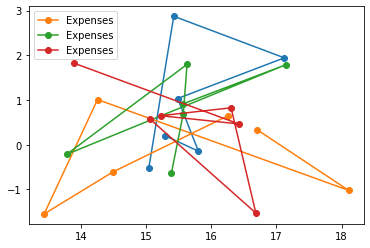

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x1, y1, linestyle="-", marker="o")
plt.plot(x2, y2, linestyle="-", marker="o", label="Expenses")
plt.plot(x3, y3, linestyle="-", marker="o", label="Expenses")
plt.plot(x4, y4, linestyle="-", marker="o", label="Expenses")
plt.legend()
plt.show()

In [ ]:
#first connected dots
#black: combination
#blue:Etoposide
#purple: Paclitaxel
import plotly.io as pio
import kaleido

import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(X_drug3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="blue")))'%(i,i))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="blue",dash="dot")))'%(i,i))
    
#for i in range(5,9):
#    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="purple")))'%(i,i))
    
#    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="purple",dash="dot")))'%(i,i))
    
#for i in range(9,13):
#    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="black")))'%(i,i))
    
#    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="black")))'%(i,i)) #row=1, col=1)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, blue: Etoposide, purple: Paclitaxel",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))
#fig.write_image("figure.png", engine="kaleido")
fig.show()
#fig.add_trace(go.Scatter(x=x2,y=y2, mode="lines",line=dict(width=2, color='skyblue')))
#trace2 = px.line(x=["a","b","c"], y=[50,70,90], title="second trace")

#fig.add_trace(trace2)
#fig.write_image("e+p.jpg", width=1920, height=1080)
#fig.write_image("e+p.png",engine='auto')

#plt.io.to_image(fig, format='png')
#image1=pio.to_image(fig,format='png')


In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

from sklearn.preprocessing import StandardScaler
model = LinearDiscriminantAnalysis(n_components=4)

#model.fit(X_drug, y)
#X_drug2 = model.transform(X_drug)
X_drug3=result.iloc[:,2:240].values
#X_drug3 = StandardScaler().fit_transform(X_drug3)
X_drug3=model.fit(X_drug3,training_label).transform(X_drug3)

In [ ]:
import copy
visualization_data=copy.deepcopy(components)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data, x=0, y=1, color=visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x,y=y, mode="lines",line=dict(width=2, color='skyblue'))) #row=1, col=1)
#fig.add_trace(go.Scatter(x=x2,y=y2, mode="lines",line=dict(width=2, color='skyblue')))
#trace2 = px.line(x=["a","b","c"], y=[50,70,90], title="second trace")

#fig.add_trace(trace2)
fig.show()

In [ ]:
visualization_data2=copy.deepcopy(components2)

In [ ]:
import copy
visualization_data3=copy.deepcopy(X_drug3)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data2, x=0, y=1, color=visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x,y=y, mode="lines",line=dict(width=2, color='skyblue'))) #row=1, col=1)
#fig.add_trace(go.Scatter(x=x2,y=y2, mode="lines",line=dict(width=2, color='skyblue')))
#trace2 = px.line(x=["a","b","c"], y=[50,70,90], title="second trace")

#fig.add_trace(trace2)
fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1, color=visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x,y=y, mode="lines",line=dict(width=2, color='skyblue'))) #row=1, col=1)
#fig.add_trace(go.Scatter(x=x2,y=y2, mode="lines",line=dict(width=2, color='skyblue')))
#trace2 = px.line(x=["a","b","c"], y=[50,70,90], title="second trace")

#fig.add_trace(trace2)
fig.show()

In [ ]:
grey_visualization_label=[]
for i in range(len(result)):
    grey_visualization_label.append('all_points')

In [ ]:
#Etoposide, Paclitaxel,saha, 17 aag, mg132, gemcitabine
#vinblastine, apicidin, auy922, ps341
#result = pd.concat([DNA,MT,HSP,PROT,HDAC,E_combine,P_combine,S_combine,AAG_combine,M_combine,G_combine,V_combine,A_combine,AUY_combine,DMSO])
len(result)
print(len(result),len(DNA),len(MT),len(DMSO),len(E_combine),len(P_combine),len(AUY_combine))
print(48*5)


1416 48 48 96 216 192 24
240


In [ ]:
import sys
import time
def progress_bar():
    for i in range(1, 101):
        print("\r", end="")
        print("Download progress: {}%: ".format(i), "▋" * (i // 2), end="")
        sys.stdout.flush()
        time.sleep(0.05)
progress_bar()

Download progress: 100%:  ▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋

In [ ]:
len(X_drug3)

1416

In [ ]:
#set up first set
#etoposide
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





e=X_drug3[0:24]
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

p=X_drug3[len(DNA):len(DNA)+24]
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

e_and_p=X_drug3[240:264]
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])

In [ ]:
!pip install plotly==5.3.1

In [ ]:
!pip install -U kaleido

Requirement already up-to-date: kaleido in /opt/anaconda3/lib/python3.8/site-packages (0.2.1)


In [ ]:
import kaleido

In [ ]:
#first connected dots
#black: combination
#blue:Etoposide
#purple: Paclitaxel
import plotly.io as pio
import kaleido

import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="blue")))'%(i,i))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="blue",dash="dot")))'%(i,i))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="purple")))'%(i,i))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="purple",dash="dot")))'%(i,i))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="black")))'%(i,i))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="black")))'%(i,i)) #row=1, col=1)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, blue: Etoposide, purple: Paclitaxel",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))
#fig.write_image("figure.png", engine="kaleido")
fig.show()
#fig.add_trace(go.Scatter(x=x2,y=y2, mode="lines",line=dict(width=2, color='skyblue')))
#trace2 = px.line(x=["a","b","c"], y=[50,70,90], title="second trace")

#fig.add_trace(trace2)
#fig.write_image("e+p.jpg", width=1920, height=1080)
#fig.write_image("e+p.png",engine='auto')

#plt.io.to_image(fig, format='png')
#image1=pio.to_image(fig,format='png')


In [ ]:
#second 
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
#from sys import builtin_module_names
import kaleido


s=X_drug3[216:240]
e_and_s=X_drug3[264:288]
df1=e
df2=s
df3=e_and_s
c1='blue'
c2='orange'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, blue: Etoposide, orange: SAHA",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)

fig.show()


In [ ]:
#third
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names


s=X_drug3[120:144]
e_and_s=X_drug3[288:312]
df1=e
df2=s
df3=e_and_s
c1='blue'
c2='yellow'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, blue: Etoposide, yellow: 17AAG",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#4
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names


s=X_drug3[144:168]
e_and_s=X_drug3[312:336]
df1=e
df2=s
df3=e_and_s
c1='blue'
c2='green'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, blue: Etoposide, green: MG132",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#5
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names


s=X_drug3[24:48]
e_and_s=X_drug3[336:360]
df1=e
df2=s
df3=e_and_s
c1='blue'
c2='green'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, blue: Etoposide, green: Gemcitabine",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#6
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names


s=X_drug3[72:96]
e_and_s=X_drug3[360:384]
df1=e
df2=s
df3=e_and_s
c1='blue'
c2='purple'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, blue: Etoposide, purple: Vinblastine",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#7
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names


s=X_drug3[192:216]
e_and_s=X_drug3[384:408]
df1=e
df2=s
df3=e_and_s
c1='blue'
c2='red'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, blue: Etoposide, red: Apicidin",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#8
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names


s=X_drug3[96:120]
e_and_s=X_drug3[408:432]
df1=e
df2=s
df3=e_and_s
c1='blue'
c2='yellow'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, blue: Etoposide, yellow: AUY922",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#9
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names


s=X_drug3[168:192]
e_and_s=X_drug3[432:456]
df1=e
df2=s
df3=e_and_s
c1='blue'
c2='green'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, blue: Etoposide, green:PS341",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#2-1
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[48:72]
s=X_drug3[216:240]
e_and_s=X_drug3[456:480]
df1=p
df2=s
df3=e_and_s
c1='purple'
c2='orange'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, purple: Paclitaxel, orange:SAHA",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#2-2
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[48:72]
s=X_drug3[120:144]
e_and_s=X_drug3[480:504]
df1=p
df2=s
df3=e_and_s
c1='purple'
c2='yellow'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, purple: Paclitaxel, yellow:17AAG",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#2-3
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[48:72]
s=X_drug3[144:168]
e_and_s=X_drug3[504:528]
df1=p
df2=s
df3=e_and_s
c1='purple'
c2='green'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, purple: Paclitaxel, green: MG132",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#2-4
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[48:72]
s=X_drug3[24:48]
e_and_s=X_drug3[528:552]
df1=p
df2=s
df3=e_and_s
c1='purple'
c2='blue'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, purple: Paclitaxel, blue: Gemcitabine",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#2-5
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[48:72]
s=X_drug3[72:96]
e_and_s=X_drug3[552:576]
df1=p
df2=s
df3=e_and_s
c1='purple'
c2='blue'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, purple: Paclitaxel, blue: Vinblastine",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#2-6
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[48:72]
s=X_drug3[192:216]
e_and_s=X_drug3[576:600]
df1=p
df2=s
df3=e_and_s
c1='purple'
c2='red'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, purple: Paclitaxel, red: Apicidin",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#2-7
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[48:72]
s=X_drug3[96:120]
e_and_s=X_drug3[600:624]
df1=p
df2=s
df3=e_and_s
c1='purple'
c2='yellow'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, purple: Paclitaxel, yellow: AUY922",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#2-8
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[48:72]
s=X_drug3[168:192]
e_and_s=X_drug3[624:648]
df1=p
df2=s
df3=e_and_s
c1='purple'
c2='green'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, purple: Paclitaxel, green: PS341",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#3-1
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[216:240]
s=X_drug3[120:144]
e_and_s=X_drug3[648:672]
df1=p
df2=s
df3=e_and_s
c1='orange'
c2='yellow'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, orange: SAHA, yellow: 17AAG",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#3-2
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[216:240]
s=X_drug3[144:168]
e_and_s=X_drug3[672:696]
df1=p
df2=s
df3=e_and_s
c1='orange'
c2='green'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, orange: SAHA, green: MG132",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#3-3
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[216:240]
s=X_drug3[24:48]
e_and_s=X_drug3[696:720]
df1=p
df2=s
df3=e_and_s
c1='orange'
c2='blue'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, orange: SAHA, blue: Gemcitabine",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#3-4
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[216:240]
s=X_drug3[72:96]
e_and_s=X_drug3[720:744]
df1=p
df2=s
df3=e_and_s
c1='orange'
c2='purple'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, orange: SAHA, purple: Vinblastine",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#3-5
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[216:240]
s=X_drug3[192:216]
e_and_s=X_drug3[744:768]
df1=p
df2=s
df3=e_and_s
c1='orange'
c2='red'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, orange: SAHA, red: Apicidin",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#3-6
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[216:240]
s=X_drug3[96:120]
e_and_s=X_drug3[768:792]
df1=p
df2=s
df3=e_and_s
c1='orange'
c2='yellow'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, orange: SAHA, yellow: AUY922",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#3-7
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[216:240]
s=X_drug3[168:192]
e_and_s=X_drug3[792:816]
df1=p
df2=s
df3=e_and_s
c1='orange'
c2='green'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, orange: SAHA, green: PS341",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#4-1
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[120:144]
s=X_drug3[144:168]
e_and_s=X_drug3[816:840]
df1=p
df2=s
df3=e_and_s
c1='yellow'
c2='green'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, orange: 17AAG, green: MG132",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#4-2
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[120:144]
s=X_drug3[24:48]
e_and_s=X_drug3[840:864]
df1=p
df2=s
df3=e_and_s
c1='yellow'
c2='blue'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, orange: 17AAG, blue: Gemcitabine",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#4-3
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[120:144]
s=X_drug3[72:96]
e_and_s=X_drug3[864:888]
df1=p
df2=s
df3=e_and_s
c1='yellow'
c2='purple'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, orange: 17AAG, purple: Vinblastine",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#4-4
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[120:144]
s=X_drug3[192:216]
e_and_s=X_drug3[888:912]
df1=p
df2=s
df3=e_and_s
c1='yellow'
c2='red'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, orange: 17AAG, red: Apicidin",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
672/24

28.0

In [ ]:
#4-5
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[120:144]
s=X_drug3[96:120]
e_and_s=X_drug3[912:936]
df1=p
df2=s
df3=e_and_s
c1='yellow'
c2='red'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, orange: 17AAG, red: AUY922",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#4-6
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[120:144]
s=X_drug3[168:192]
e_and_s=X_drug3[936:960]
df1=p
df2=s
df3=e_and_s
c1='yellow'
c2='green'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, orange: 17AAG, green: PS341",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#5-1
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[144:168]
s=X_drug3[24:48]
e_and_s=X_drug3[960:984]
df1=p
df2=s
df3=e_and_s
c1='green'
c2='blue'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, green: MG132, blue: Gemcitabine",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#5-2
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[144:168]
s=X_drug3[72:96]
e_and_s=X_drug3[984:1008]
df1=p
df2=s
df3=e_and_s
c1='green'
c2='purple'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, green: MG132, purple: Vinblastine",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#5-3
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[144:168]
s=X_drug3[192:216]
e_and_s=X_drug3[1008:1032]
df1=p
df2=s
df3=e_and_s
c1='green'
c2='red'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, green: MG132, red: Apicidin",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#5-4
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[144:168]
s=X_drug3[96:120]
e_and_s=X_drug3[1032:1056]
df1=p
df2=s
df3=e_and_s
c1='green'
c2='yellow'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, green: MG132, yellow: AUY922",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#5-5
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[144:168]
s=X_drug3[168:192]
e_and_s=X_drug3[1056:1080]
df1=p
df2=s
df3=e_and_s
c1='green'
c2='yellow'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, green: MG132, yellow: PS341",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#6-1
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[24:48]
s=X_drug3[120:144]
e_and_s=X_drug3[1080:1104]
df1=p
df2=s
df3=e_and_s
c1='blue'
c2='purple'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, blue: Gemcitabine, purple: Vinblastine",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#6-2
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[24:48]
s=X_drug3[192:216]
e_and_s=X_drug3[1104:1128]
df1=p
df2=s
df3=e_and_s
c1='blue'
c2='red'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, blue: Gemcitabine, red: Apicidin",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#6-3
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[24:48]
s=X_drug3[96:120]
e_and_s=X_drug3[1128:1152]
df1=p
df2=s
df3=e_and_s
c1='blue'
c2='yellow'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, blue: Gemcitabine, yellow: AUY922",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#6-4
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[24:48]
s=X_drug3[168:192]
e_and_s=X_drug3[1152:1176]
df1=p
df2=s
df3=e_and_s
c1='blue'
c2='green'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, blue: Gemcitabine, green: PS341",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#7-1
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[72:96]
s=X_drug3[192:216]
e_and_s=X_drug3[1176:1200]
df1=p
df2=s
df3=e_and_s
c1='purple'
c2='red'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, purple: Vinblastine, red: Apicidin",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#7-2
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[72:96]
s=X_drug3[96:120]
e_and_s=X_drug3[1176:1200]
df1=p
df2=s
df3=e_and_s
c1='purple'
c2='yellow'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, purple: Vinblastine, yellow: AUY922",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#7-3
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[72:96]
s=X_drug3[168:192]
e_and_s=X_drug3[1200:1224]
df1=p
df2=s
df3=e_and_s
c1='purple'
c2='green'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, purple: Vinblastine, green: PS341",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#8-1
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[192:216]
s=X_drug3[96:120]
e_and_s=X_drug3[1224:1248]
df1=p
df2=s
df3=e_and_s
c1='red'
c2='yellow'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, red: Apicidin, yellow: AUY922",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#8-2
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[192:216]
s=X_drug3[168:192]
e_and_s=X_drug3[1248:1272]
df1=p
df2=s
df3=e_and_s
c1='red'
c2='green'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, red: Apicidin, green: PS341",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()


In [ ]:
#9-1
#etoposide +saha(red)
#set up first set
#etoposide
#provide 3 dfs. provide three colors.
from sys import builtin_module_names

p=X_drug3[96:120]
s=X_drug3[168:192]
e_and_s=X_drug3[1272:1296]
df1=p
df2=s
df3=e_and_s
c1='yellow'
c2='green'
c3='black'

e=df1
p=df2
e_and_p=df3
c1=c1
c2=c2
c3=c3
for i in range(0,13):
    exec("x%d"%i+"=[]")
    exec("y%d"%i+"=[]")





    
for i in range(0,24,4):
    x1.append(e[i][0])
    y1.append(e[i][1])
for i in range(1,24,4):
    x2.append(e[i][0])
    y2.append(e[i][1])
for i in range(2,24,4):
    x3.append(e[i][0])
    y3.append(e[i][1])
for i in range(3,24,4):
    x4.append(e[i][0])
    y4.append(e[i][1])

    
for i in range(0,24,4):
    x5.append(p[i][0])
    y5.append(p[i][1])
for i in range(1,24,4):
    x6.append(p[i][0])
    y6.append(p[i][1])
for i in range(2,24,4):
    x7.append(p[i][0])
    y7.append(p[i][1])
for i in range(3,24,4):
    x8.append(p[i][0])
    y8.append(p[i][1])

    
for i in range(0,24,4):
    x9.append(e_and_p[i][0])
    y9.append(e_and_p[i][1])
for i in range(1,24,4):
    x10.append(e_and_p[i][0])
    y10.append(e_and_p[i][1])
for i in range(2,24,4):
    x11.append(e_and_p[i][0])
    y11.append(e_and_p[i][1])
for i in range(3,24,4):
    x12.append(e_and_p[i][0])
    y12.append(e_and_p[i][1])
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(visualization_data3, x=0, y=1,opacity=0.2,color_discrete_sequence=['grey']) #color=grey_visualization_label)
#training['drug_name']
#fig.add_trace(go.Scatter(x=x1, y=y1, mode="markers",line=dict(color="blue")))

for i in range(5):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c1))

    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c1))
    
for i in range(5,9):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c2))
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c2))
    
for i in range(9,13):
    exec('fig.add_trace(go.Scatter(x=x%d, y=y%d, mode="markers",line=dict(color="%s")))'%(i,i,c3))
    
    
    exec('fig.add_trace(go.Scatter(x=x%d,y=y%d, mode="lines",line=dict(width=3, color="%s")))'%(i,i,c3)) #row=1, col=1)
#print(x1)
#print(len(e),len(p),len(e_and_p),c1,c2,c3)
fig.add_annotation(dict(font=dict(color='brown',size=15),
                                        x=0,
                                        y=-0.12,
                                        showarrow=False,
                                        text="black:combination, yellow: AUY922, green: PS341",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

fig.show()
